# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("darkgrid")
sns.set_context("notebook")
pd.set_option('display.width', 500)
%matplotlib inline

# Importing Data

In [2]:
raw_data = pd.read_csv("Data/nfl_pbp_cleaned_dataset")
raw_data

play_id     game_id posteam defteam  yardline_100   game_date  quarter_seconds_remaining  half_seconds_remaining  game_seconds_remaining game_half  ...  posteam_timeouts_remaining  defteam_timeouts_remaining posteam_score  defteam_score        wp    def_wp posteam_home  side_of_field_own            scor_diff  yards_for_first_down
0            68  2009091000     PIT     TEN            58  2009-09-10                        893                    1793                  3593.0     Half1  ...                           3                           3             0              0  0.546433  0.453567            1                  1                 tied                    10
1            92  2009091000     PIT     TEN            53  2009-09-10                        856                    1756                  3556.0     Half1  ...                           3                           3             0              0  0.551088  0.448912            1                  1                 tied                   4-6
2           113  2009091000     PIT     TEN            56  2009-09-10                        815                    1715                  3515.0     Half1  ...                           3                           3             0              0  0.510793  0.489207            1                  1                 tied                   7-9
3           162  2009091000     TEN     PIT            98  2009-09-10                        796                    1696                  3496.0     Half1  ...                           3                           3             0              0  0.441071  0.558929            0                  1                 tied                    10
4           183  2009091000     TEN     PIT            98  2009-09-10                        760                    1660                  3460.0     Half1  ...                           3                           3             0              0  0.421547  0.578453            0                  1                 tied                    10
...         ...         ...     ...     ...           ...         ...                        ...                     ...                     ...       ...  ...                         ...                         ...           ...            ...       ...       ...          ...                ...                  ...                   ...
349933     3877  2019122915     SEA      SF            12  2019-12-29                         42                      42                    42.0     Half2  ...                           0                           1            21             26  0.110884  0.889116            1                  0  behind_by_one_score                    10
349934     3955  2019122915     SEA      SF             5  2019-12-29                         22                      22                    22.0     Half2  ...                           0                           1            21             26  0.235896  0.764104            1                  0  behind_by_one_score                   4-6
349935     3977  2019122915     SEA      SF             5  2019-12-29                         15                      15                    15.0     Half2  ...                           0                           1            21             26  0.068701  0.931299            1                  0  behind_by_one_score                   4-6
349936     3999  2019122915     SEA      SF             5  2019-12-29                         12                      12                    12.0     Half2  ...                           0                           1            21             26  0.026141  0.973859            1                  0  behind_by_one_score                   4-6
349937     4080  2019122915      SF     SEA            99  2019-12-29                          9                       9                     9.0     Half2  ...                           1                           0            26             21  0.963173  0.036827    

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349938 entries, 0 to 349937
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   play_id                     349938 non-null  int64  
 1   game_id                     349938 non-null  int64  
 2   posteam                     349938 non-null  object 
 3   defteam                     349938 non-null  object 
 4   yardline_100                349938 non-null  int64  
 5   game_date                   349938 non-null  object 
 6   quarter_seconds_remaining   349938 non-null  int64  
 7   half_seconds_remaining      349938 non-null  int64  
 8   game_seconds_remaining      349938 non-null  float64
 9   game_half                   349938 non-null  object 
 10  sp                          349938 non-null  int64  
 11  qtr                         349938 non-null  int64  
 12  down                        349938 non-null  object 
 13  goal_to_go    

In [4]:
raw_data['year'] = raw_data['game_date'].str[:4]
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349938 entries, 0 to 349937
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   play_id                     349938 non-null  int64  
 1   game_id                     349938 non-null  int64  
 2   posteam                     349938 non-null  object 
 3   defteam                     349938 non-null  object 
 4   yardline_100                349938 non-null  int64  
 5   game_date                   349938 non-null  object 
 6   quarter_seconds_remaining   349938 non-null  int64  
 7   half_seconds_remaining      349938 non-null  int64  
 8   game_seconds_remaining      349938 non-null  float64
 9   game_half                   349938 non-null  object 
 10  sp                          349938 non-null  int64  
 11  qtr                         349938 non-null  int64  
 12  down                        349938 non-null  object 
 13  goal_to_go    

In [5]:
pass_plays_only = raw_data[raw_data.play_type == 'pass']
pass_plays_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205740 entries, 0 to 349936
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   play_id                     205740 non-null  int64  
 1   game_id                     205740 non-null  int64  
 2   posteam                     205740 non-null  object 
 3   defteam                     205740 non-null  object 
 4   yardline_100                205740 non-null  int64  
 5   game_date                   205740 non-null  object 
 6   quarter_seconds_remaining   205740 non-null  int64  
 7   half_seconds_remaining      205740 non-null  int64  
 8   game_seconds_remaining      205740 non-null  float64
 9   game_half                   205740 non-null  object 
 10  sp                          205740 non-null  int64  
 11  qtr                         205740 non-null  int64  
 12  down                        205740 non-null  object 
 13  goal_to_go    

In [6]:
run_plays_only = raw_data[raw_data.play_type == 'run']
run_plays_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144198 entries, 1 to 349937
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   play_id                     144198 non-null  int64  
 1   game_id                     144198 non-null  int64  
 2   posteam                     144198 non-null  object 
 3   defteam                     144198 non-null  object 
 4   yardline_100                144198 non-null  int64  
 5   game_date                   144198 non-null  object 
 6   quarter_seconds_remaining   144198 non-null  int64  
 7   half_seconds_remaining      144198 non-null  int64  
 8   game_seconds_remaining      144198 non-null  float64
 9   game_half                   144198 non-null  object 
 10  sp                          144198 non-null  int64  
 11  qtr                         144198 non-null  int64  
 12  down                        144198 non-null  object 
 13  goal_to_go    

# Data Visualizations

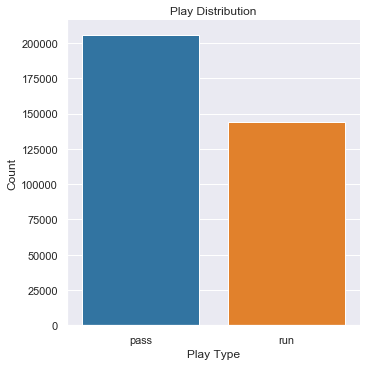

In [7]:
sns.catplot(x='play_type',kind = 'count', data = raw_data)
plt.title('Play Distribution')
plt.xlabel('Play Type')
plt.ylabel('Count')
plt.show()

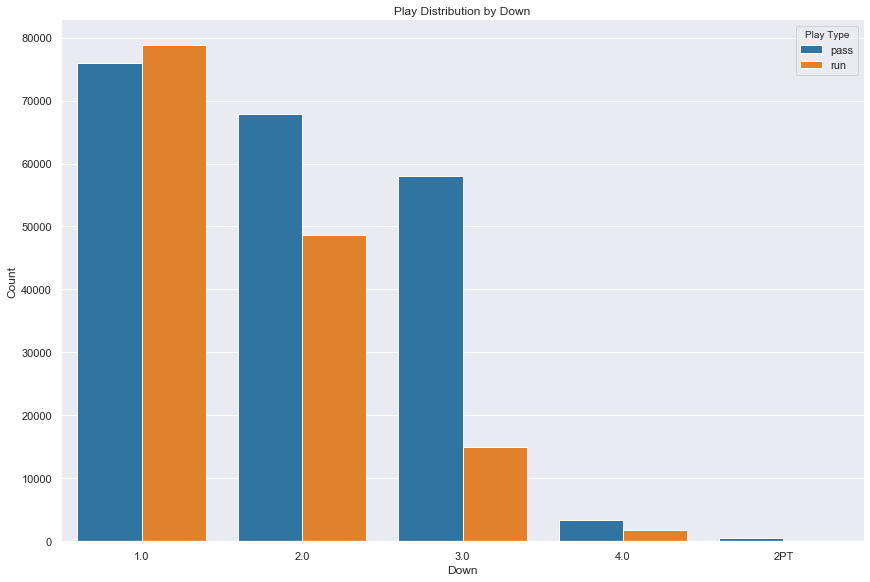

In [8]:
a = sns.catplot(x='down',hue = 'play_type',kind = 'count', data = raw_data, height = 8, aspect = 1.5,legend = False)
plt.title('Play Distribution by Down')
plt.xlabel('Down')
plt.ylabel('Count')
plt.legend(title = 'Play Type', fancybox = True, loc = 'upper right')
plt.show()

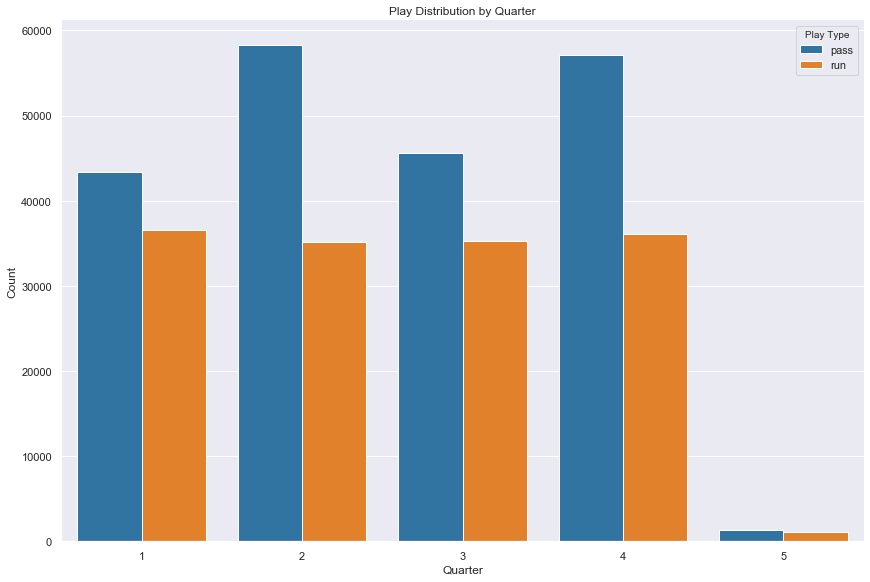

In [9]:
a = sns.catplot(x='qtr',hue = 'play_type',kind = 'count', data = raw_data, height = 8, aspect = 1.5,legend = False)
plt.title('Play Distribution by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.legend(title = 'Play Type', fancybox = True, loc = 'upper right')
plt.show()

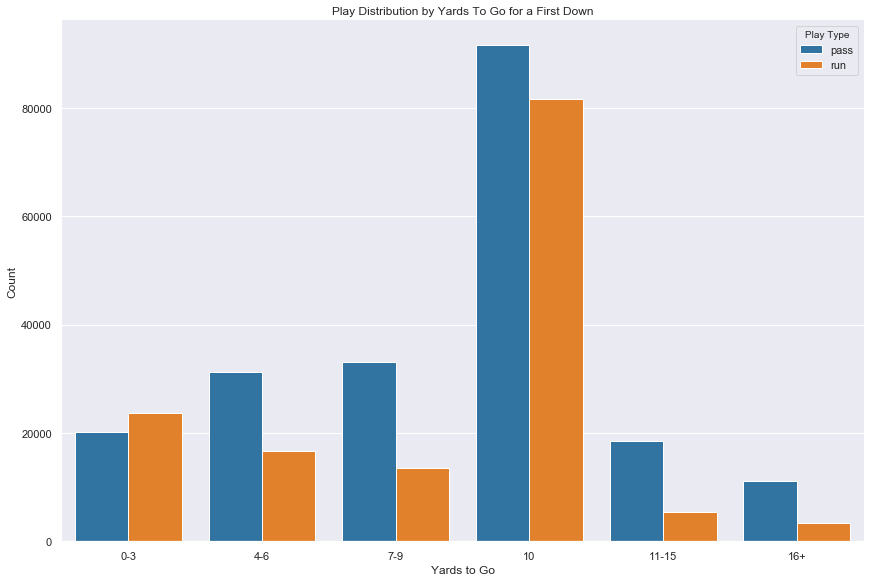

In [10]:
sns.catplot(x='yards_for_first_down', hue = 'play_type',kind = 'count', 
            data = raw_data, height = 8, aspect = 1.5, legend = False,
           order = ['0-3','4-6','7-9','10','11-15','16+'])
plt.title('Play Distribution by Yards To Go for a First Down')
plt.xlabel('Yards to Go')
plt.ylabel('Count')
plt.legend(title = 'Play Type', fancybox = True, loc = 'upper right')
plt.show()

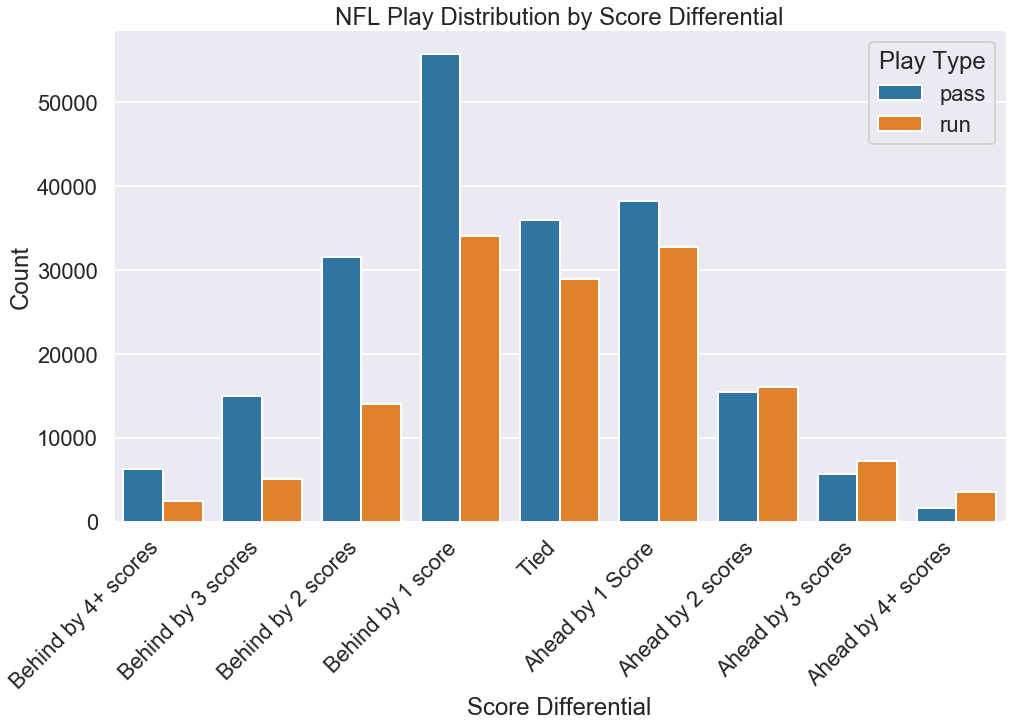

In [11]:
sns.set_context('poster')
#plt.figure(figsize = (8,12))
sns.catplot(x='scor_diff', hue = 'play_type',kind = 'count', data = raw_data, legend = False,
           order = ['behind_by_four_plus_scores','behind_by_three_scores',
                        'behind_by_two_scores', 'behind_by_one_score', 'tied',
                        'ahead_by_one_score', 'ahead_by_two_scores',
                        'ahead_by_three_scores', 'ahead_by_four_plus_scores'])
plt.title('NFL Play Distribution by Score Differential')
plt.xlabel('Score Differential')
plt.xticks(np.arange(9),['Behind by 4+ scores','Behind by 3 scores', 'Behind by 2 scores',
                    'Behind by 1 score', 'Tied', 'Ahead by 1 Score', 'Ahead by 2 scores',
                    'Ahead by 3 scores', 'Ahead by 4+ scores'], rotation =45, horizontalalignment='right')
plt.ylabel('Count')
plt.legend(title = 'Play Type', fancybox = True, loc = 'upper right')
plt.gcf().set_size_inches(80, 10)
plt.show()

In [135]:
scor_diff_counts = (raw_data.groupby(['scor_diff'])['play_type']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
scor_diff_counts

scor_diff play_type  percentage
0    ahead_by_four_plus_scores       run   67.635734
1    ahead_by_four_plus_scores      pass   32.364266
2           ahead_by_one_score      pass   53.879395
3           ahead_by_one_score       run   46.120605
4        ahead_by_three_scores       run   56.218637
5        ahead_by_three_scores      pass   43.781363
6          ahead_by_two_scores       run   50.908860
7          ahead_by_two_scores      pass   49.091140
8   behind_by_four_plus_scores      pass   71.657937
9   behind_by_four_plus_scores       run   28.342063
10         behind_by_one_score      pass   62.077598
11         behind_by_one_score       run   37.922402
12      behind_by_three_scores      pass   74.685057
13      behind_by_three_scores       run   25.314943
14        behind_by_two_scores      pass   69.310428
15        behind_by_two_scores       run   30.689572
16                        tied      pass   55.398374
17                        tied       run   44.601626

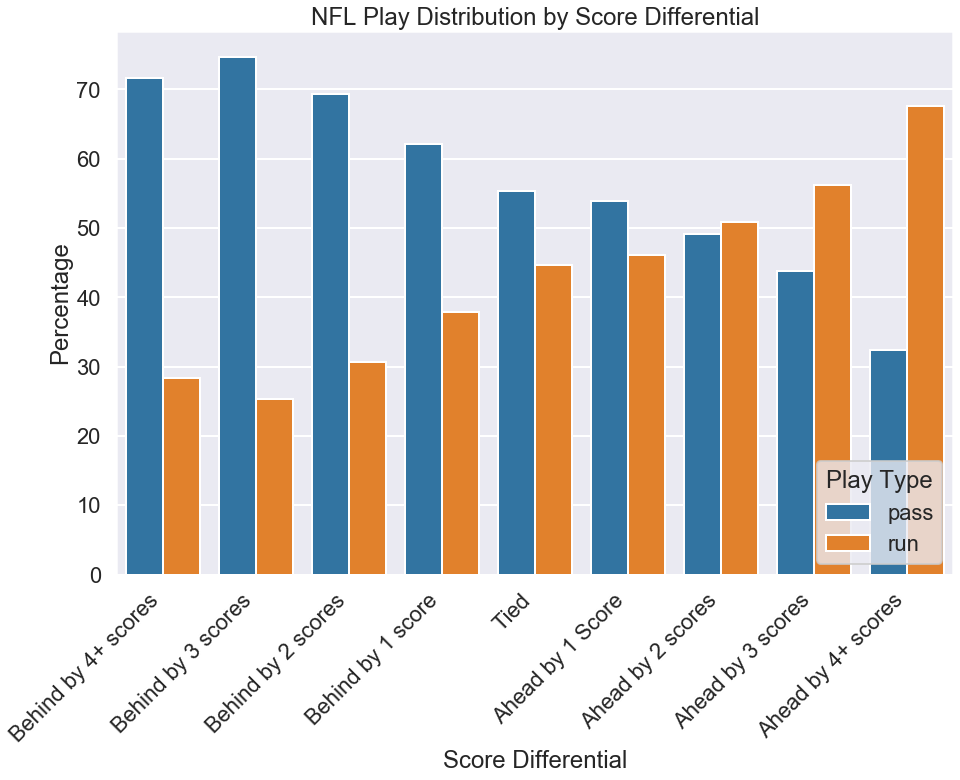

In [138]:
sns.set_context('poster')
plt.figure(figsize= (15,10))
sns.barplot(x="scor_diff", y=scor_diff_counts.percentage, hue="play_type", data=scor_diff_counts,
            order = ['behind_by_four_plus_scores','behind_by_three_scores',
                        'behind_by_two_scores', 'behind_by_one_score', 'tied',
                        'ahead_by_one_score', 'ahead_by_two_scores',
                        'ahead_by_three_scores', 'ahead_by_four_plus_scores'],
           hue_order = ['pass','run'])
plt.title('NFL Play Distribution by Score Differential')
plt.xlabel('Score Differential')
plt.ylabel('Percentage')
plt.xticks(np.arange(9),['Behind by 4+ scores','Behind by 3 scores', 'Behind by 2 scores',
                    'Behind by 1 score', 'Tied', 'Ahead by 1 Score', 'Ahead by 2 scores',
                    'Ahead by 3 scores', 'Ahead by 4+ scores'], rotation =45, horizontalalignment='right')
plt.legend(title = 'Play Type', fancybox = True, loc = 'lower right')
plt.show()

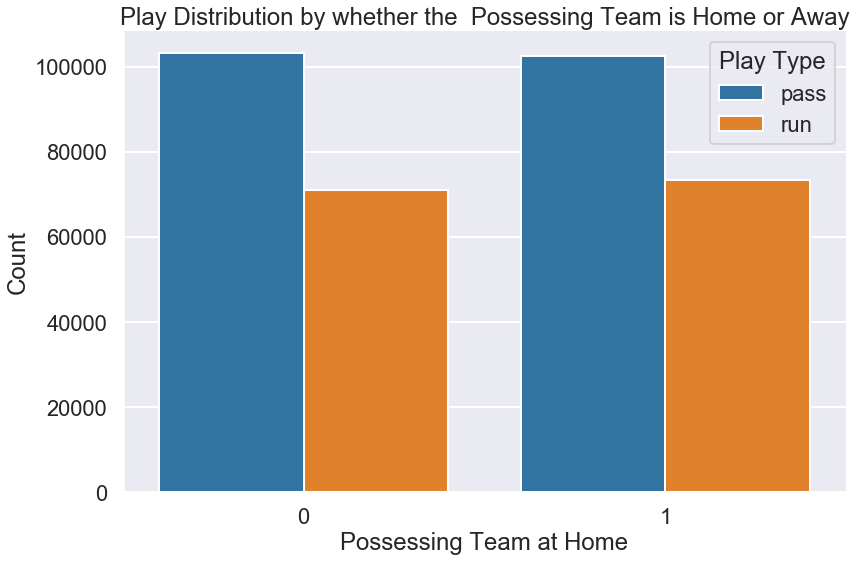

In [12]:
sns.catplot(x='posteam_home', hue = 'play_type',kind = 'count', data = raw_data, height = 8, aspect = 1.5, legend = False)
plt.title('Play Distribution by whether the  Possessing Team is Home or Away')
plt.xlabel('Possessing Team at Home')
plt.ylabel('Count')
plt.legend(title = 'Play Type', fancybox = True, loc = 'upper right')
plt.show()

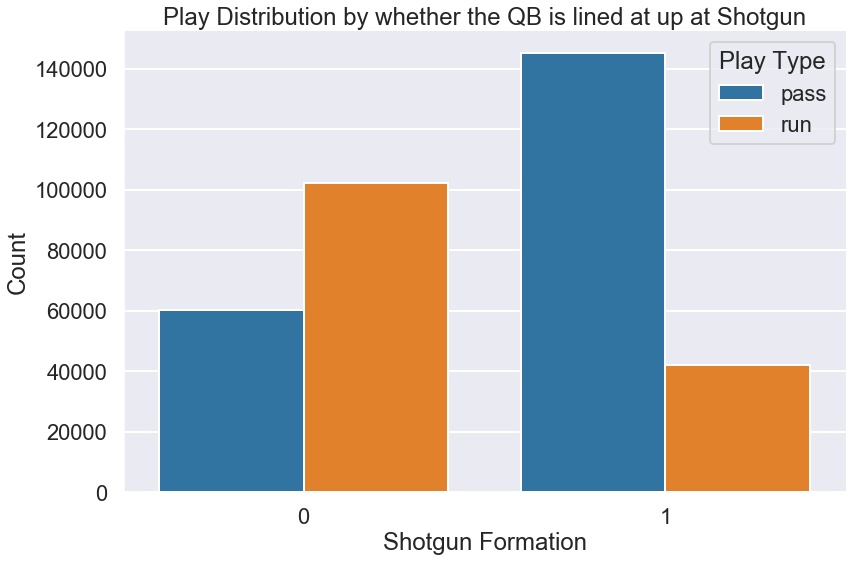

In [13]:
sns.catplot(x='shotgun', hue = 'play_type',kind = 'count', data = raw_data, height = 8, aspect = 1.5, legend = False)
plt.title('Play Distribution by whether the QB is lined at up at Shotgun')
plt.xlabel('Shotgun Formation')
plt.ylabel('Count')
plt.legend(title = 'Play Type', fancybox = True, loc = 'upper right')
plt.show()

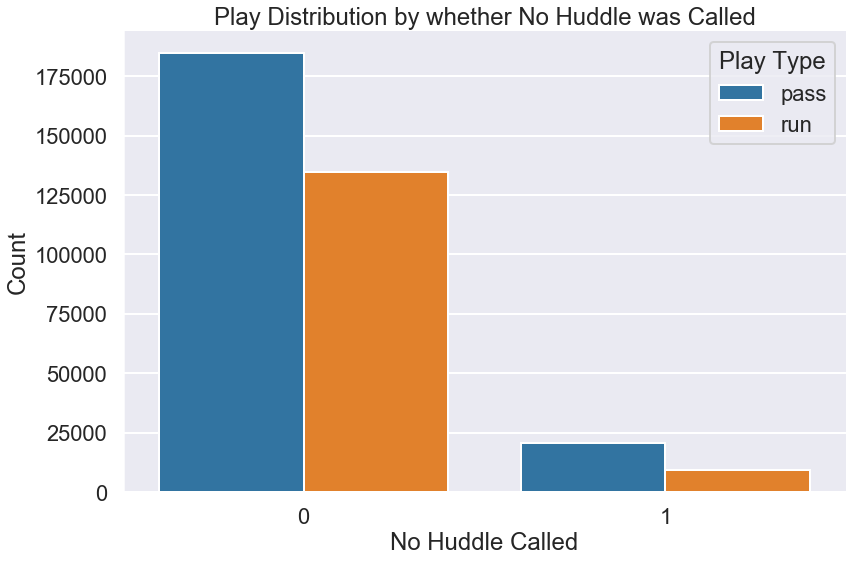

In [14]:
sns.catplot(x='no_huddle', hue = 'play_type',kind = 'count', data = raw_data, height = 8, aspect = 1.5, legend = False)
plt.title('Play Distribution by whether No Huddle was Called')
plt.xlabel('No Huddle Called')
plt.ylabel('Count')
plt.legend(title = 'Play Type', fancybox = True, loc = 'upper right')
plt.show()

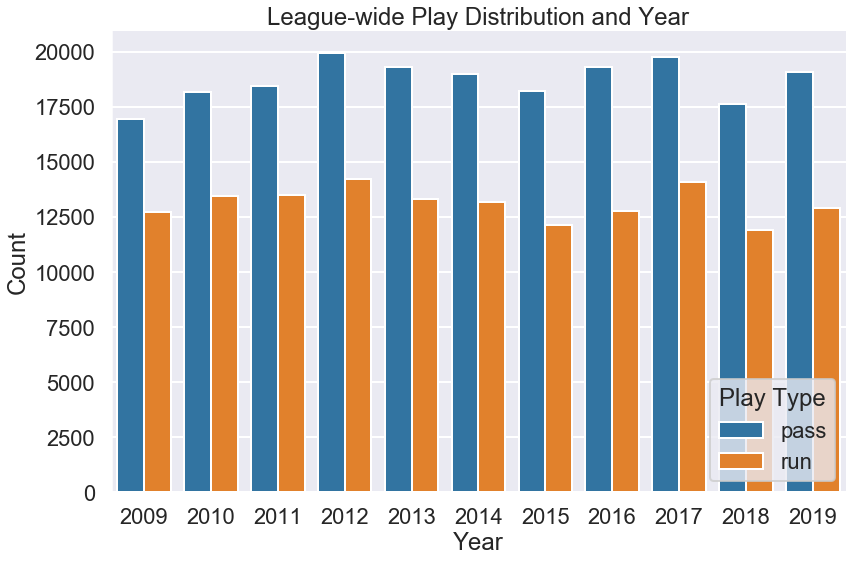

In [15]:
sns.set_context('poster')
sns.catplot(x='year', hue = 'play_type',kind = 'count', data = raw_data, height = 8, aspect = 1.5, legend = False)
plt.title('League-wide Play Distribution and Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title = 'Play Type', fancybox = True, loc = 'lower right')
plt.show()

In [105]:
pass_first_data = raw_data[['year','play_type']]
pass_first_counts = pass_first_data.groupby(['year','play_type'])['play_type'].agg(['count'])
pass_first_counts = pass_first_counts.reset_index()
pass_first_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       22 non-null     object
 1   play_type  22 non-null     object
 2   count      22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [128]:
pass_counts = (raw_data.groupby(['year'])['play_type']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
pass_counts

year play_type  percentage
0   2009      pass   57.101928
1   2009       run   42.898072
2   2010      pass   57.478173
3   2010       run   42.521827
4   2011      pass   57.766580
5   2011       run   42.233420
6   2012      pass   58.394545
7   2012       run   41.605455
8   2013      pass   59.156398
9   2013       run   40.843602
10  2014      pass   59.015017
11  2014       run   40.984983
12  2015      pass   59.985507
13  2015       run   40.014493
14  2016      pass   60.188273
15  2016       run   39.811727
16  2017      pass   58.366816
17  2017       run   41.633184
18  2018      pass   59.642821
19  2018       run   40.357179
20  2019      pass   59.657633
21  2019       run   40.342367

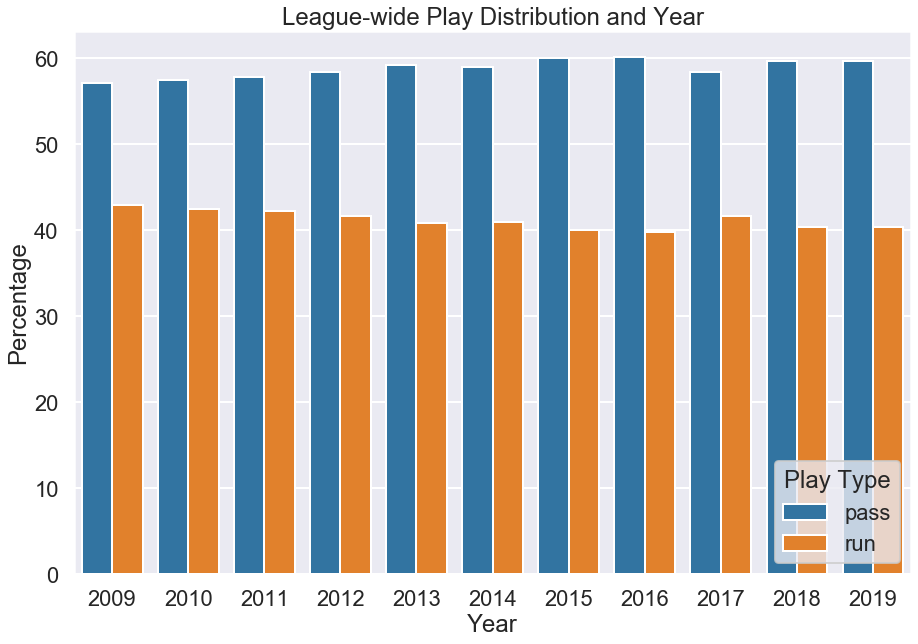

In [127]:
sns.set_context('poster')
plt.figure(figsize= (15,10))
sns.barplot(x="year", y=pass_counts.percentage, hue="play_type", data=pass_first_counts)
plt.title('League-wide Play Distribution and Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title = 'Play Type', fancybox = True, loc = 'lower right')
plt.show()

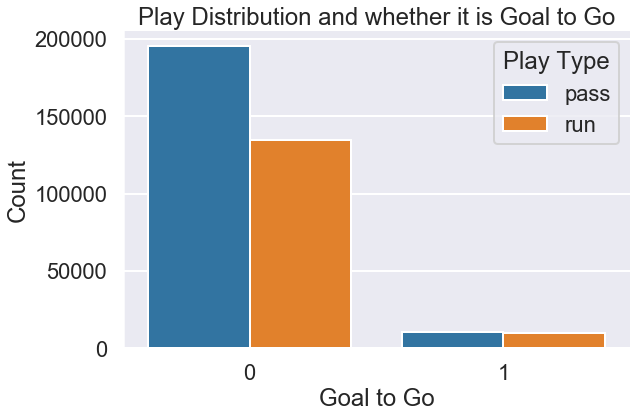

In [16]:
sns.catplot(x='goal_to_go', hue = 'play_type',kind = 'count', data = raw_data, height = 6, aspect = 1.5, legend = False)
plt.title('Play Distribution and whether it is Goal to Go')
plt.xlabel('Goal to Go')
plt.ylabel('Count')
plt.legend(title = 'Play Type', fancybox = True, loc = 'upper right')
plt.show()

# Team Based Visualizations

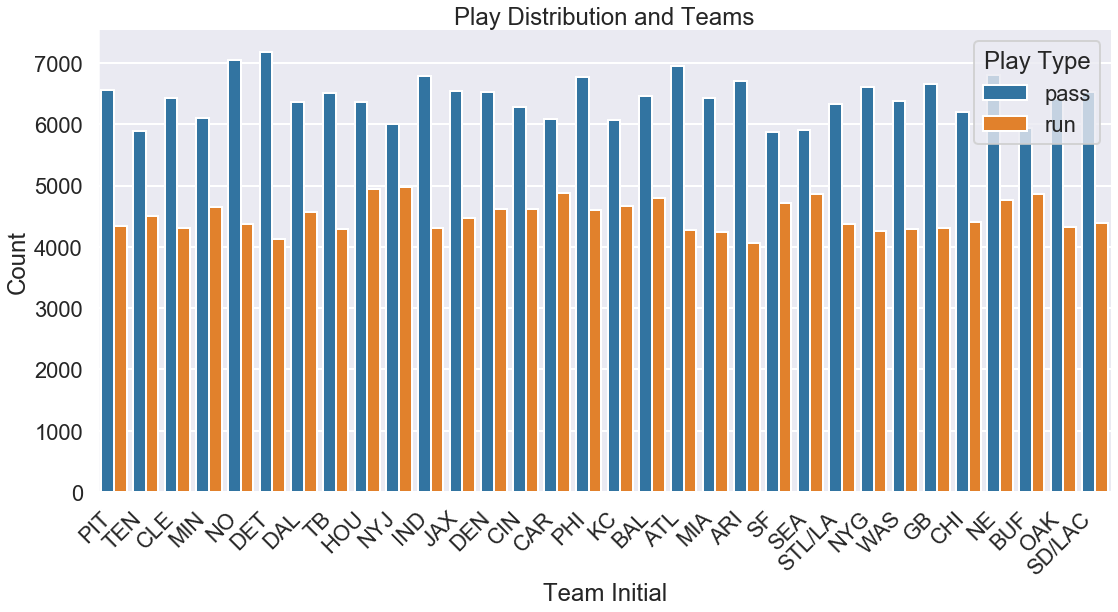

In [17]:
sns.set_context('poster')
sns.catplot(x='posteam', hue = 'play_type',kind = 'count', data = raw_data, height = 8, aspect = 2, legend = False)
plt.title('Play Distribution and Teams')
plt.xlabel('Team Initial')
plt.ylabel('Count')
plt.legend(title = 'Play Type', fancybox = True, loc = 'upper right')
plt.xticks(rotation =45, horizontalalignment='right')
plt.show()

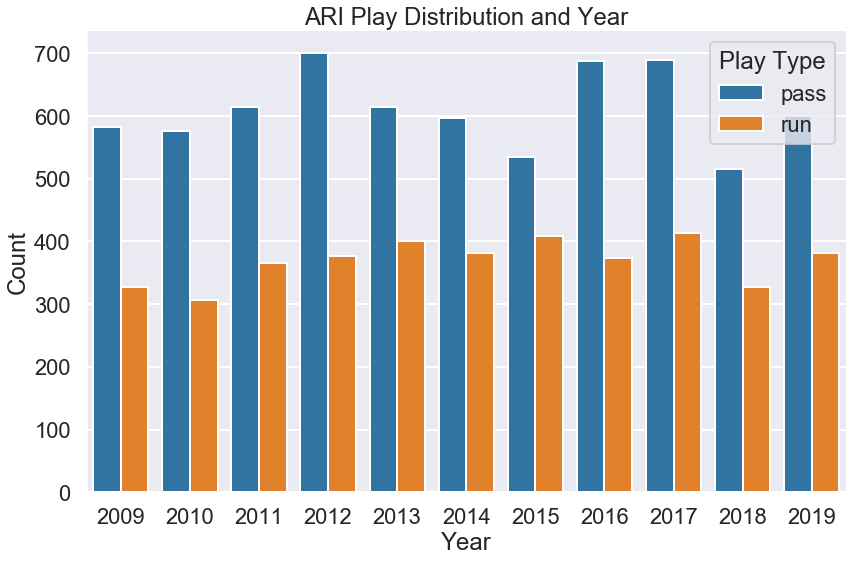

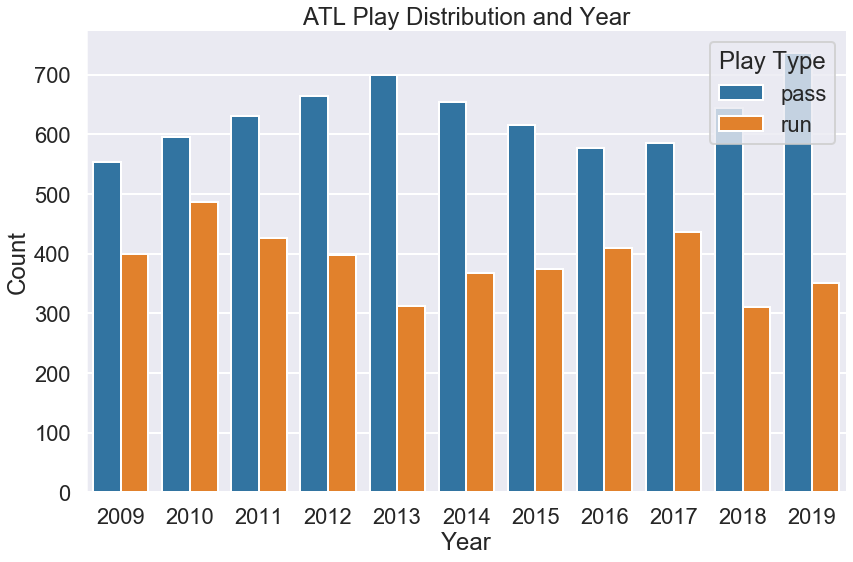

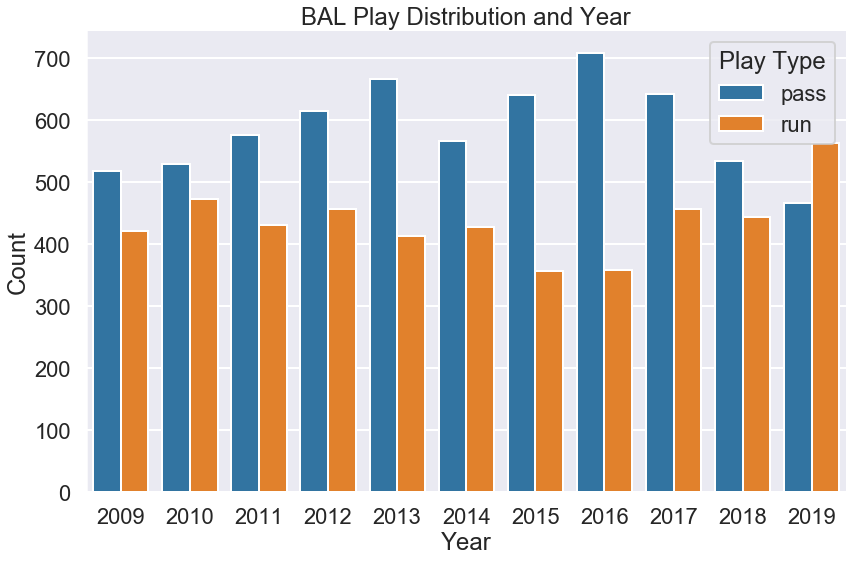

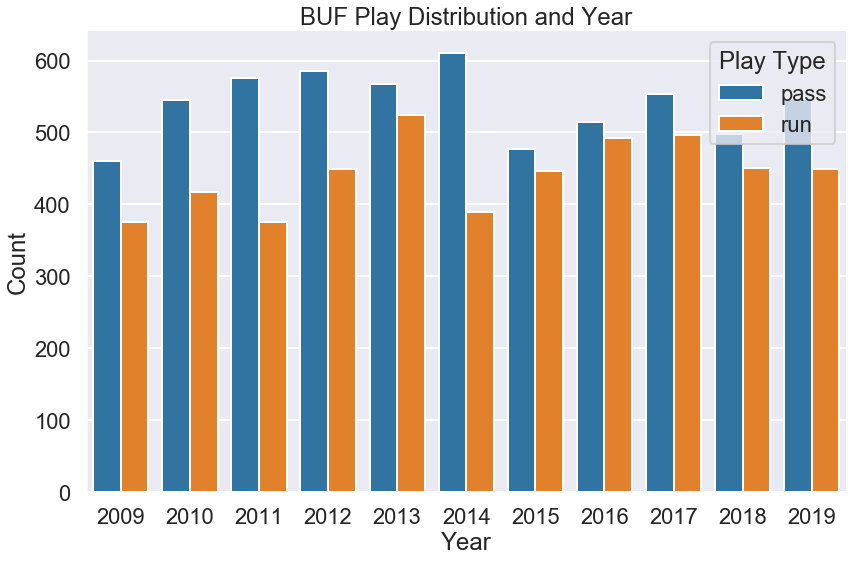

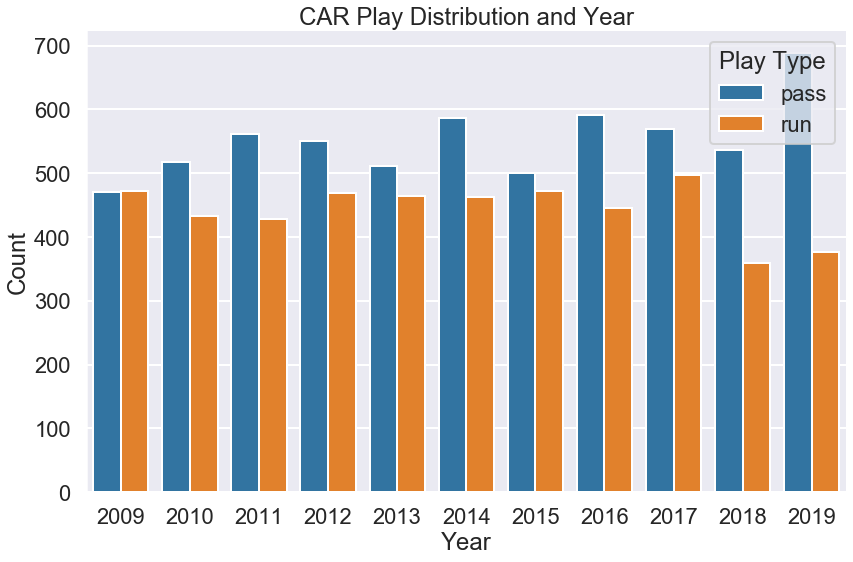

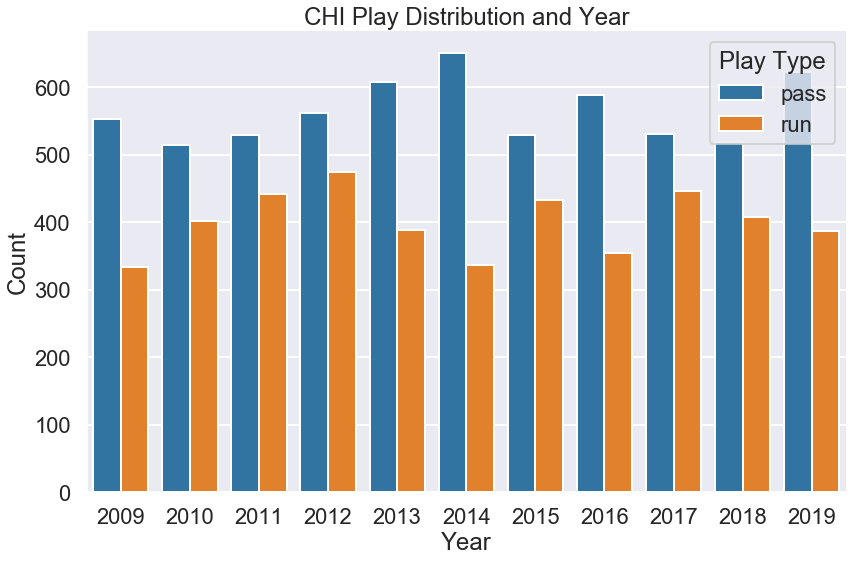

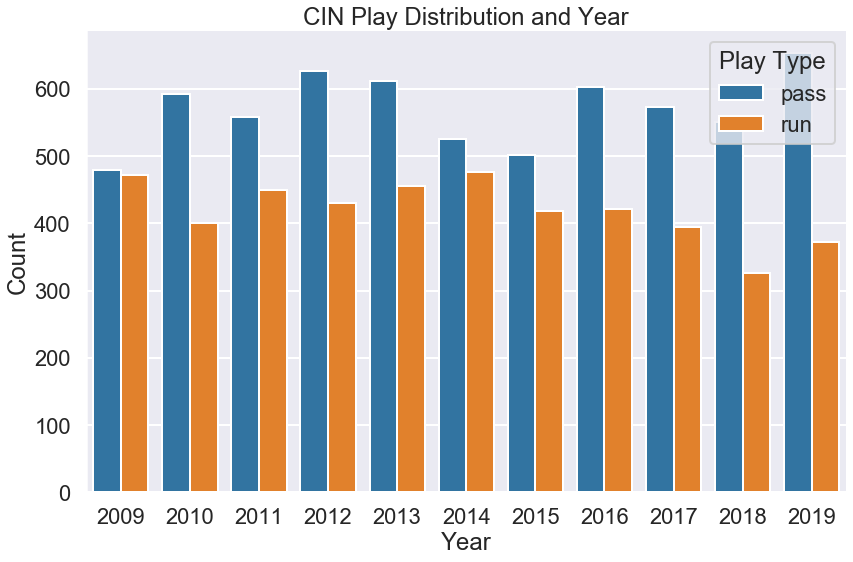

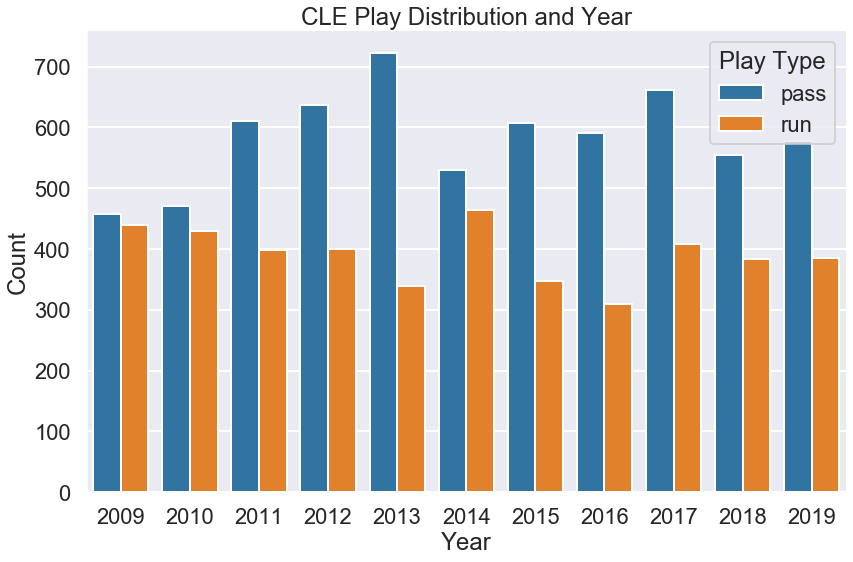

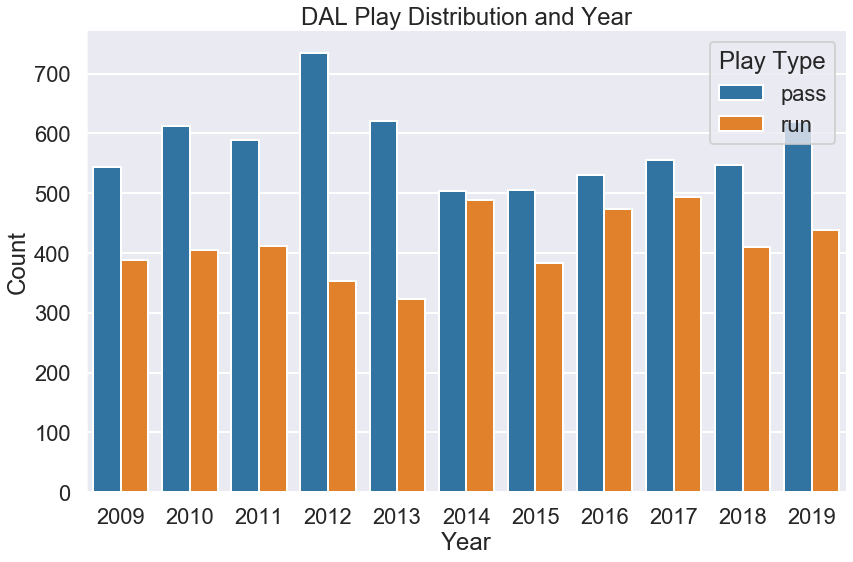

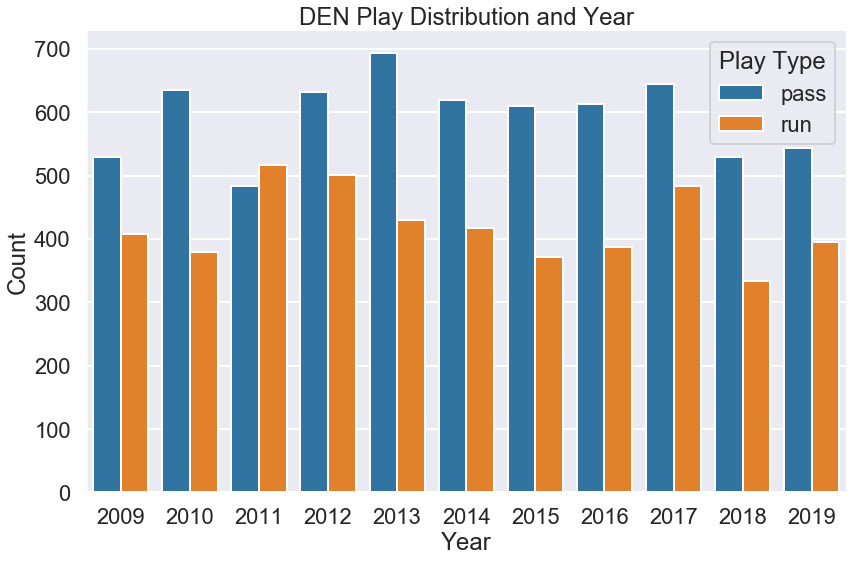

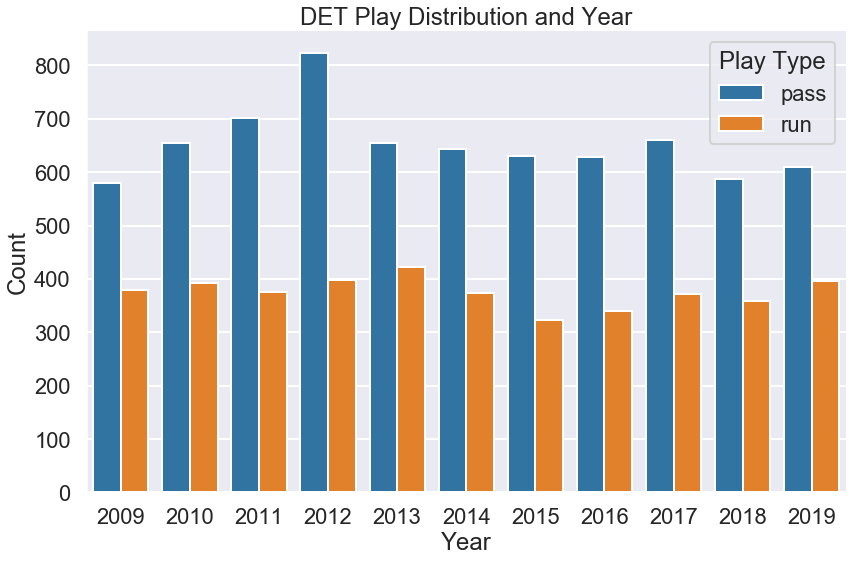

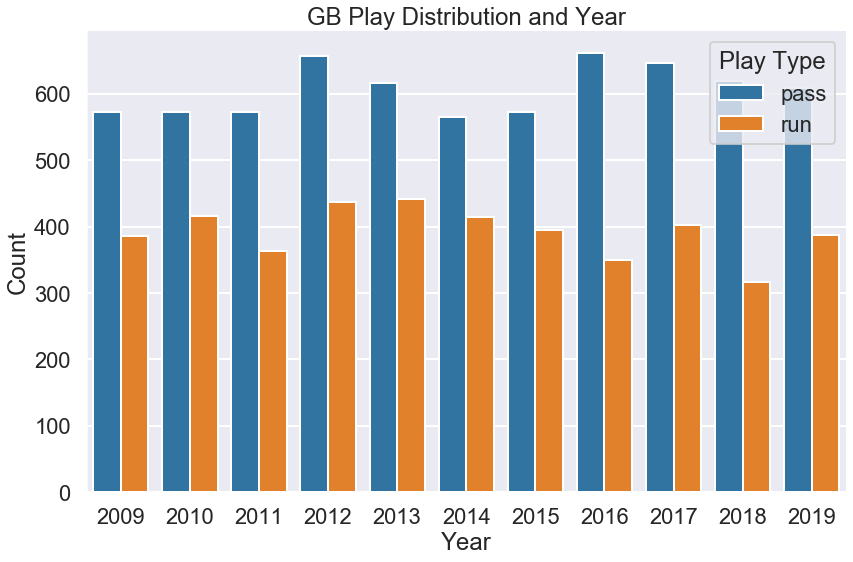

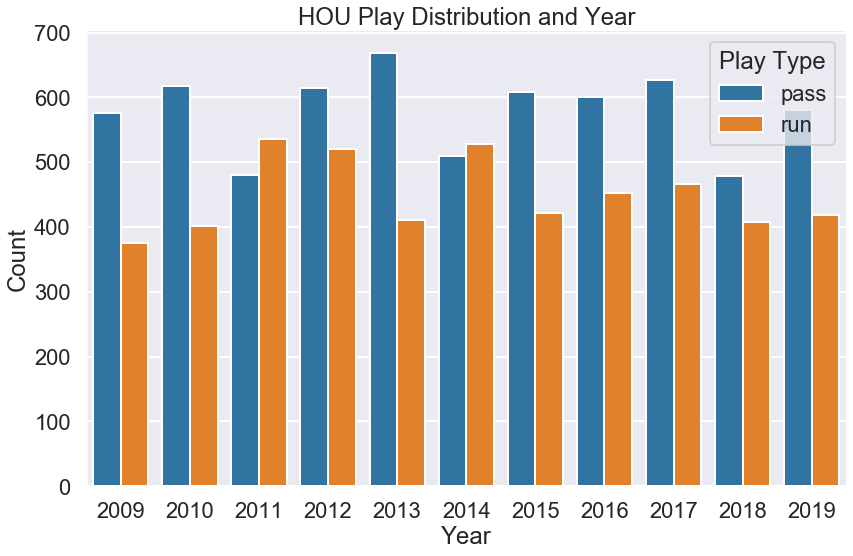

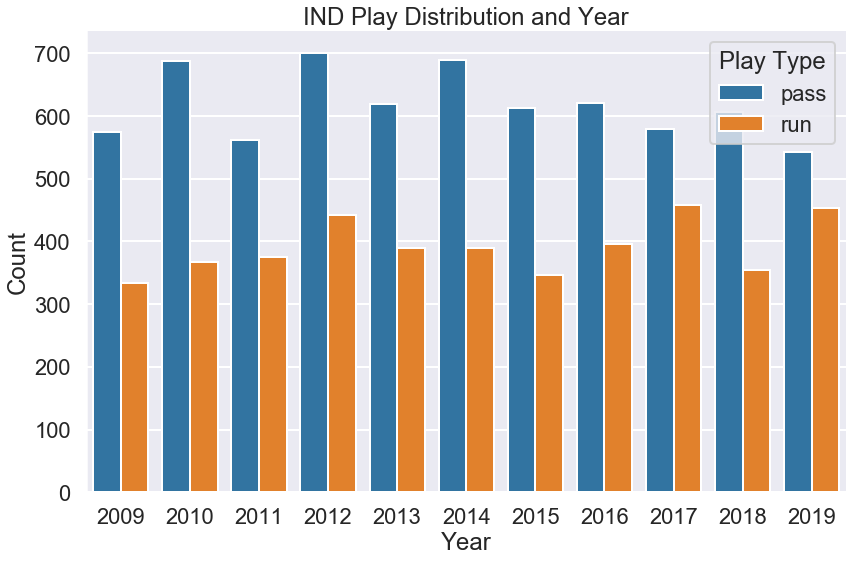

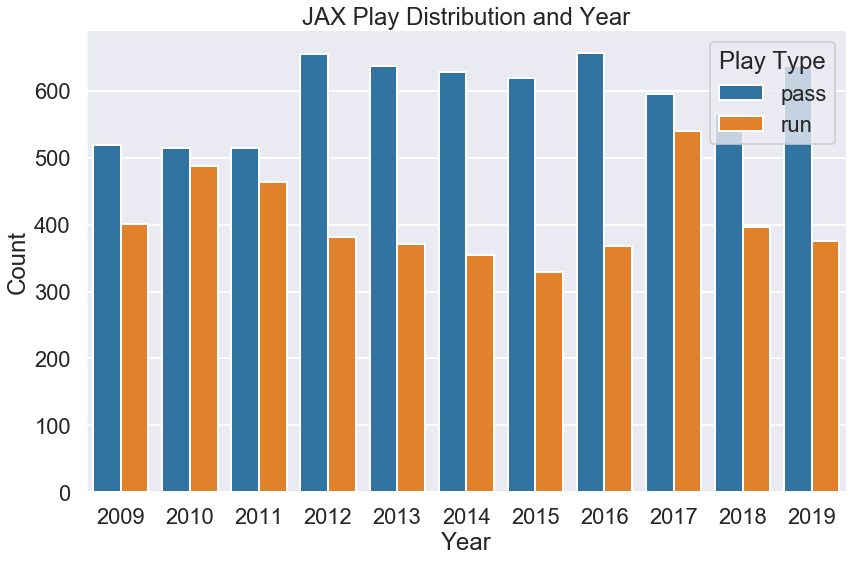

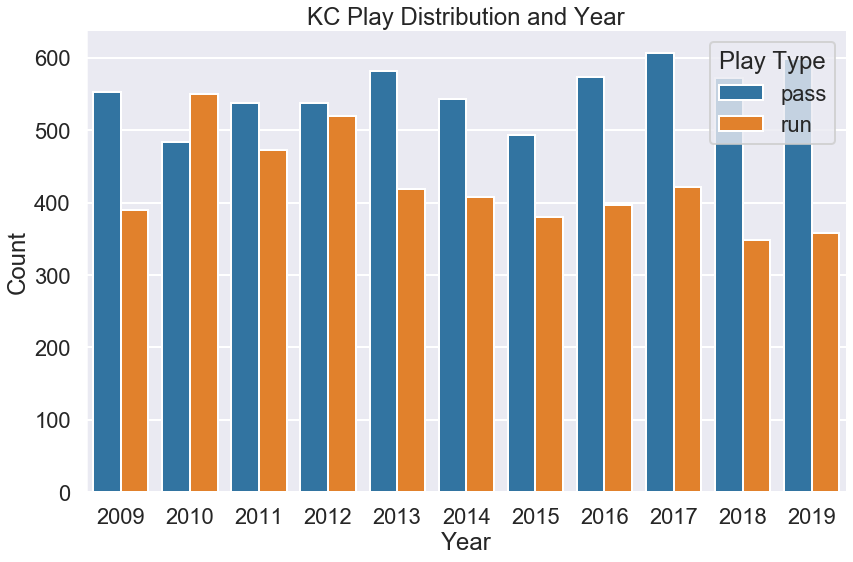

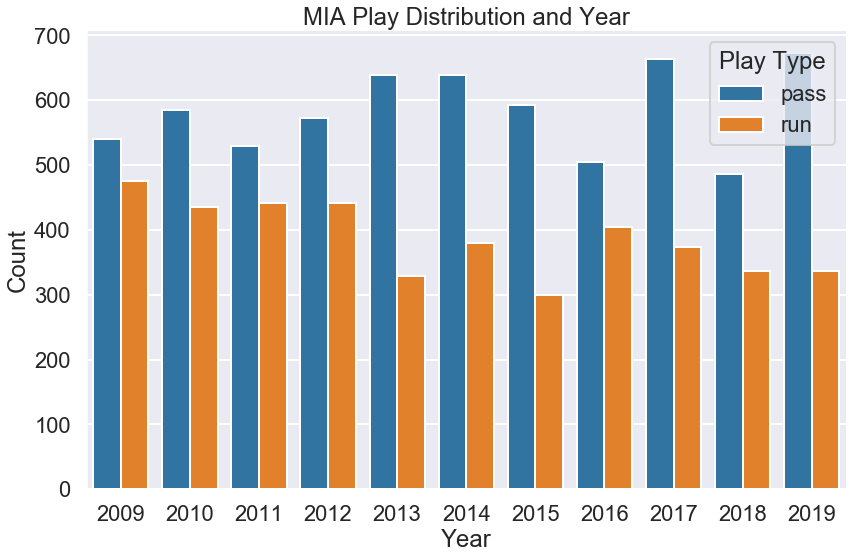

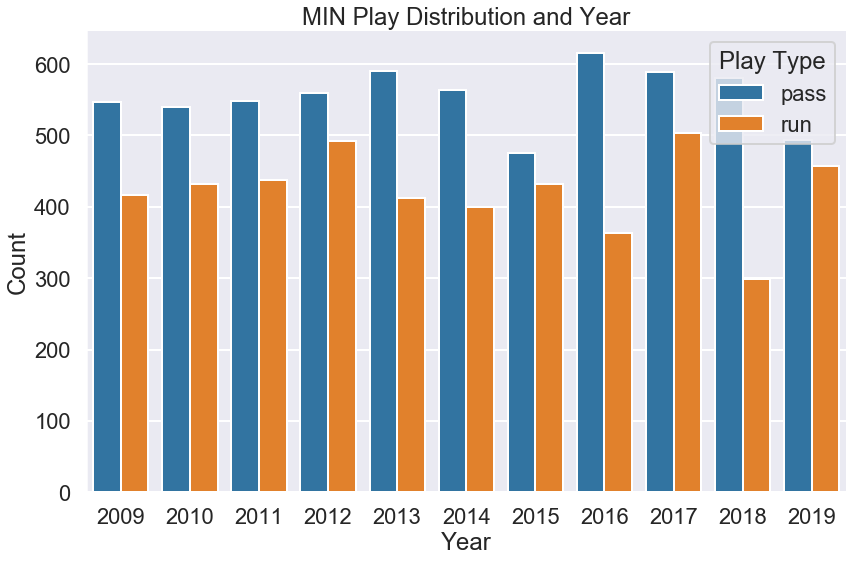

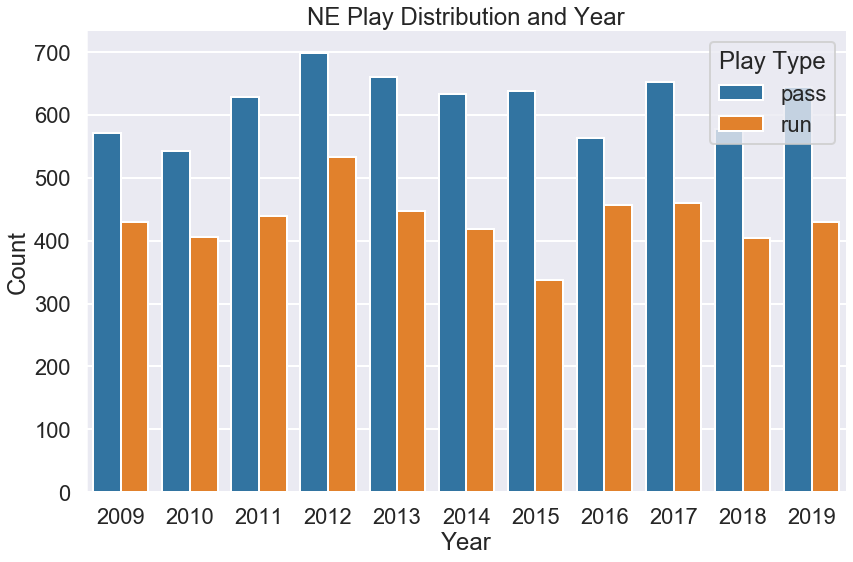

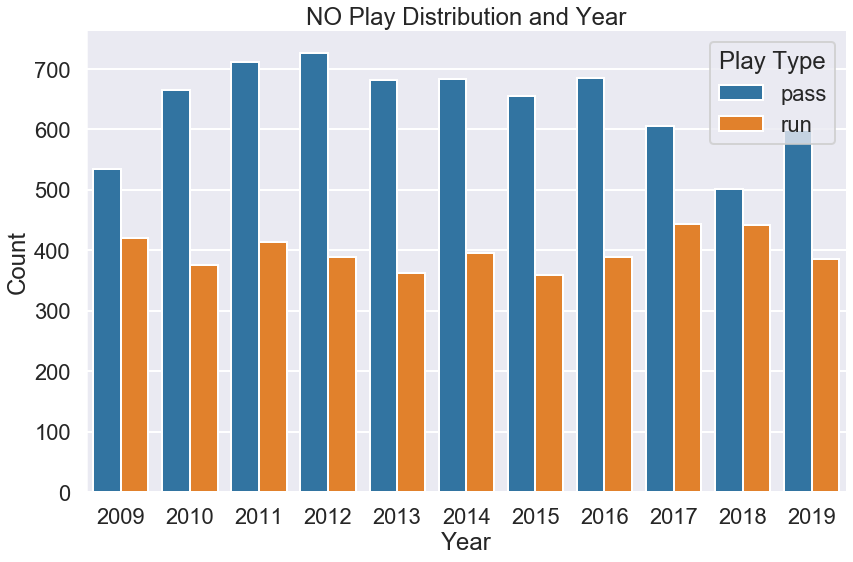

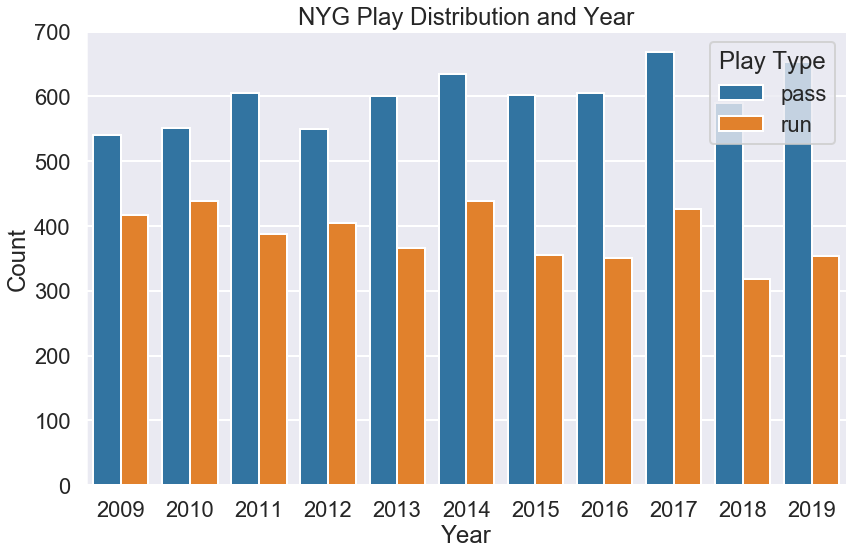

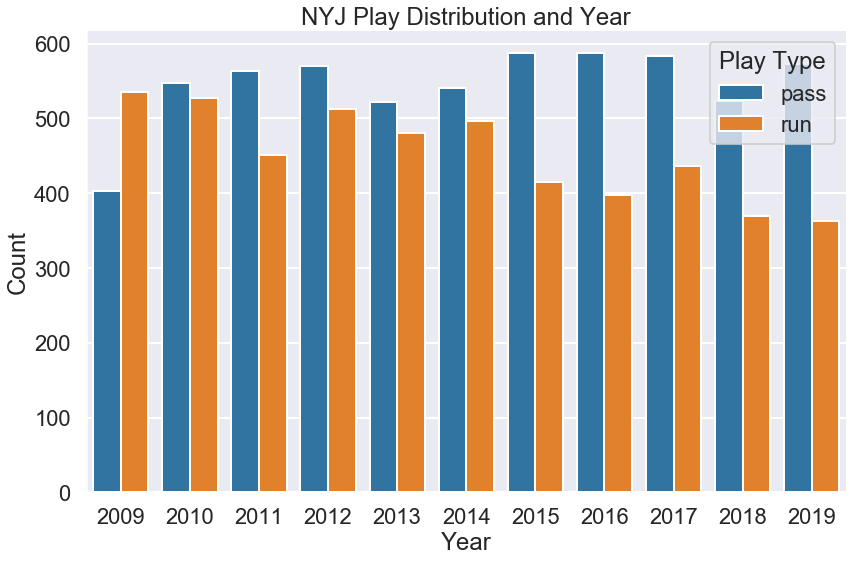

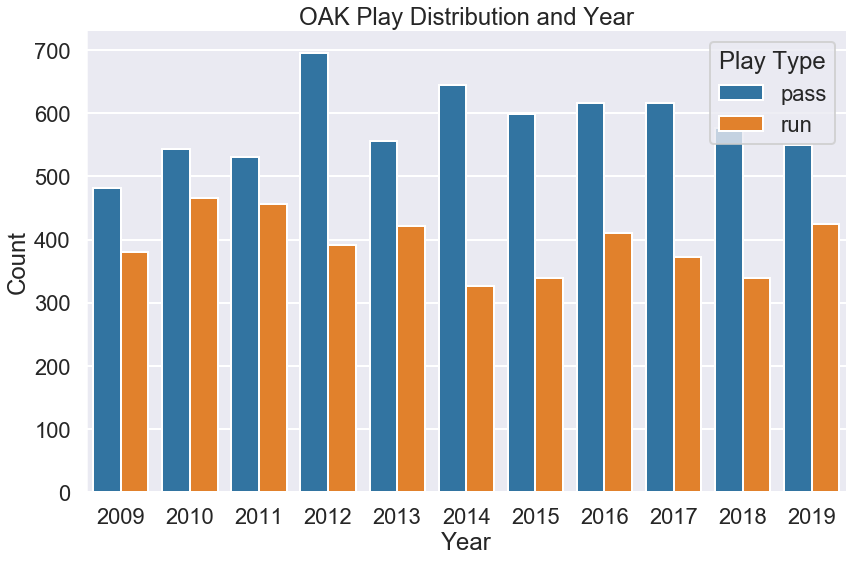

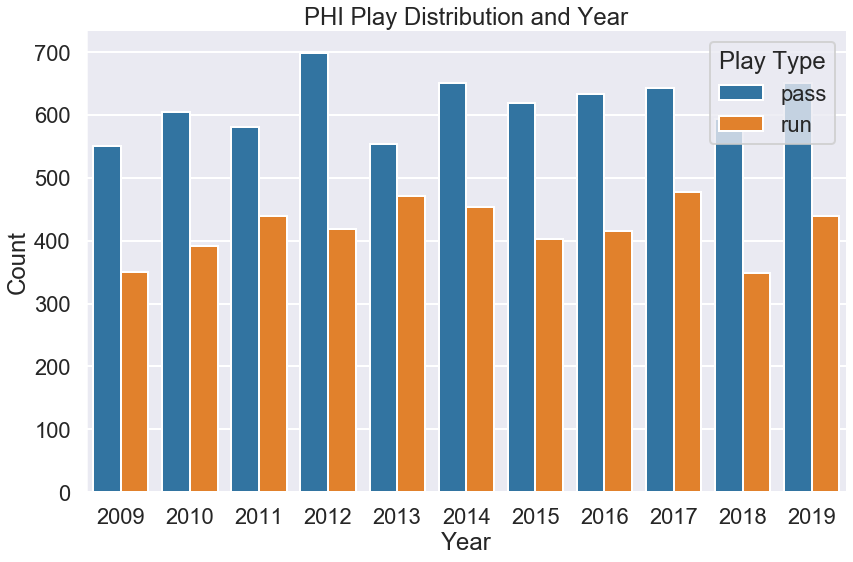

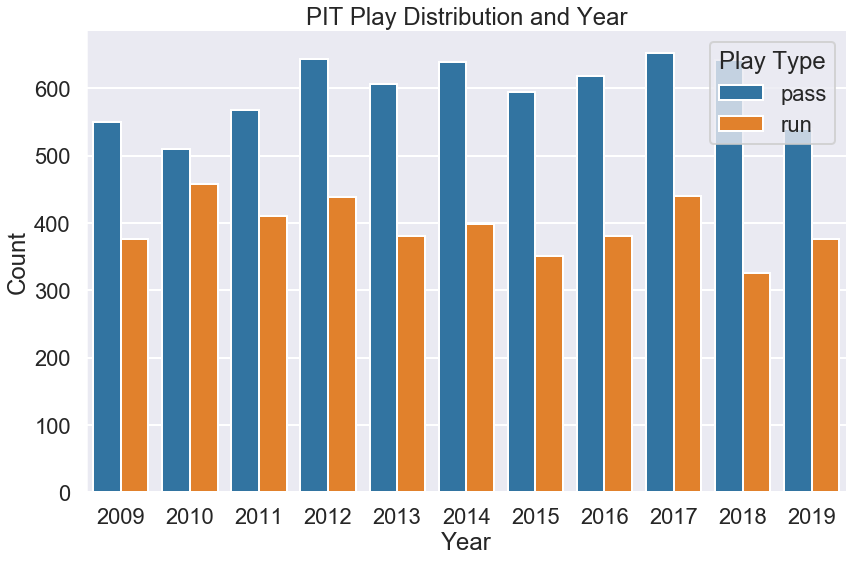

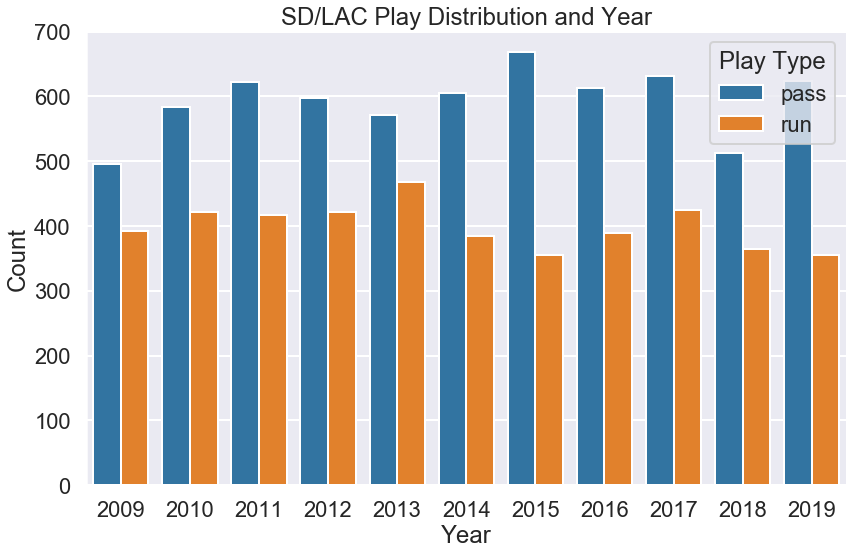

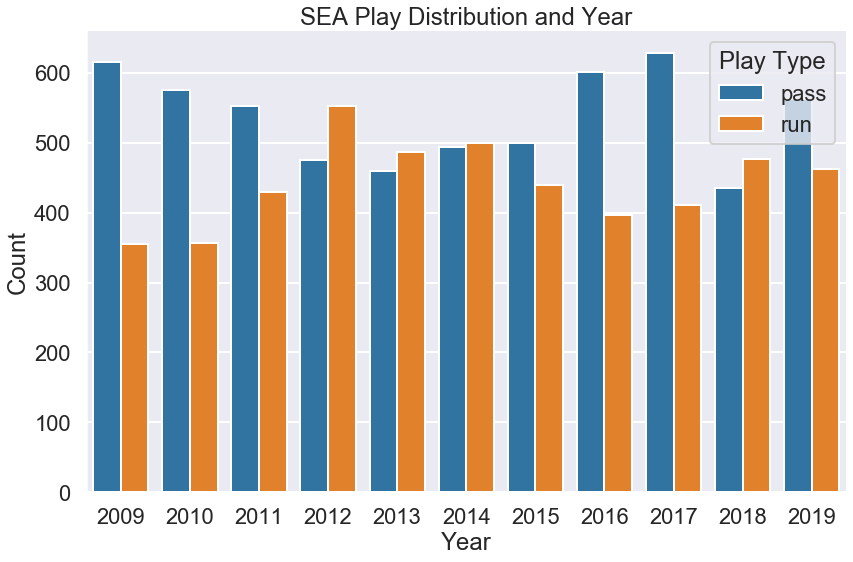

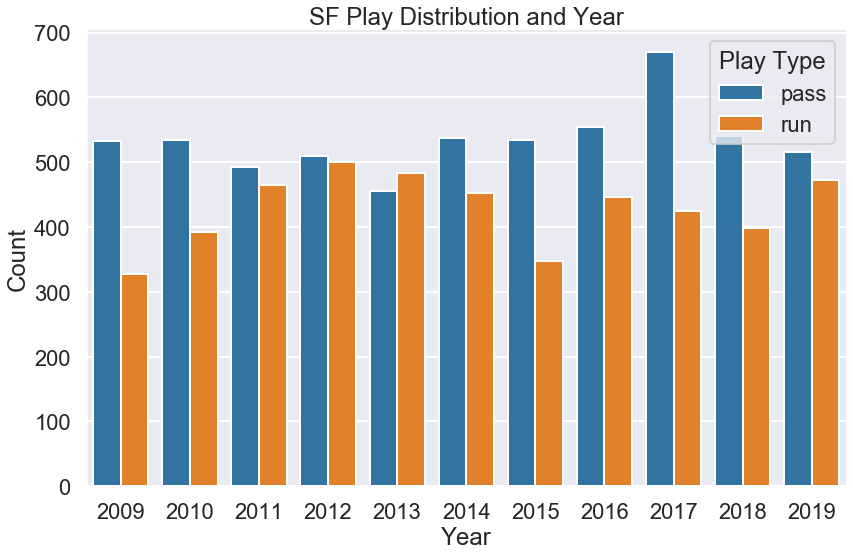

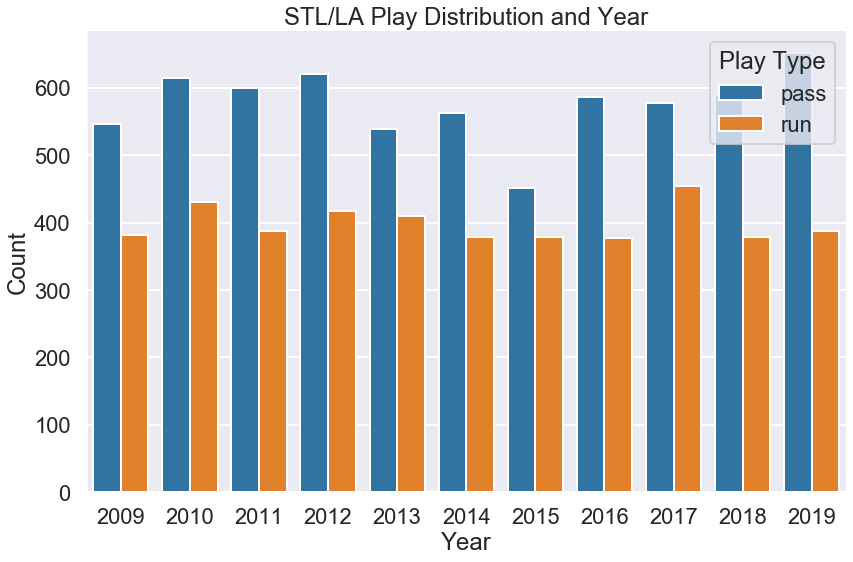

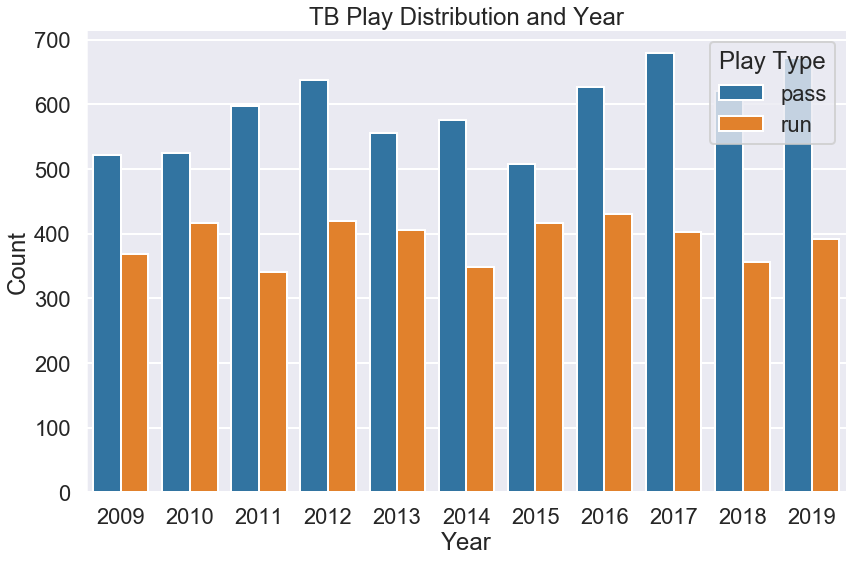

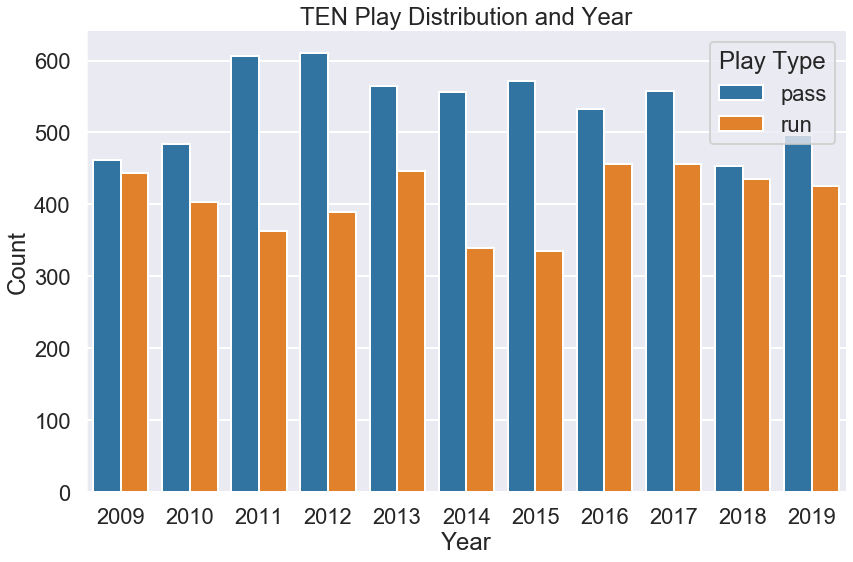

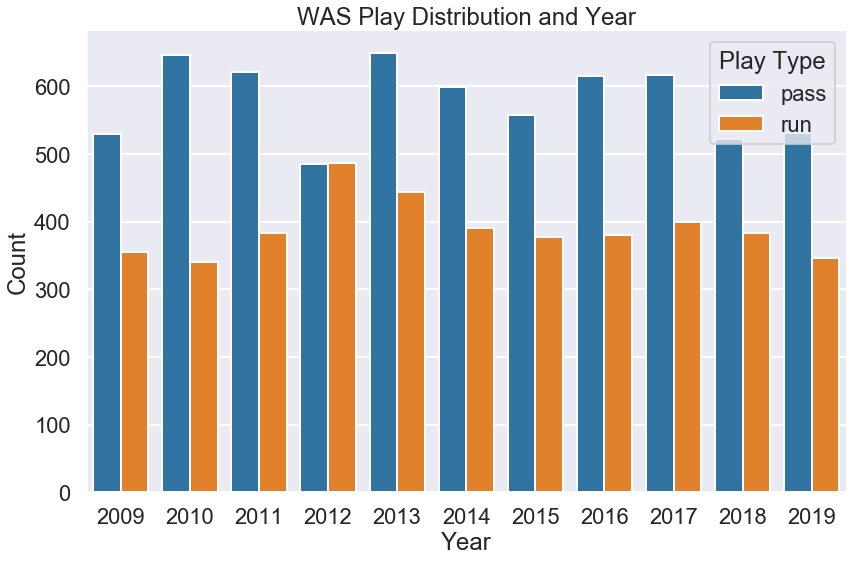

In [18]:
teams = raw_data.posteam.unique()
teams.sort()
for team in teams:
    data = raw_data[raw_data.posteam == team]
    sns.catplot(x='year', hue = 'play_type',kind = 'count', hue_order = ['pass','run'], data = data, height = 8, aspect = 1.5, legend = False)
    plt.title(team +' Play Distribution and Year')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend(title = 'Play Type', fancybox = True, loc = 'upper right')
    plt.show()

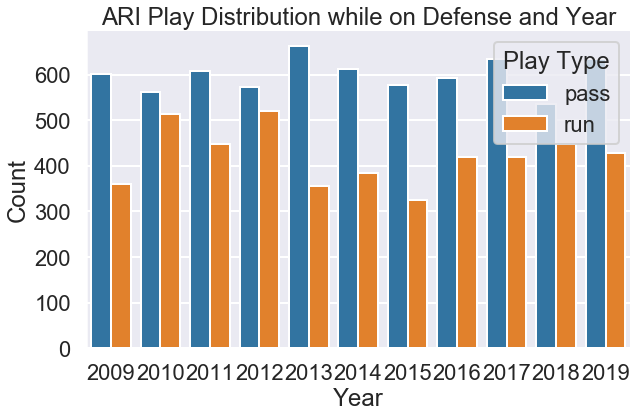

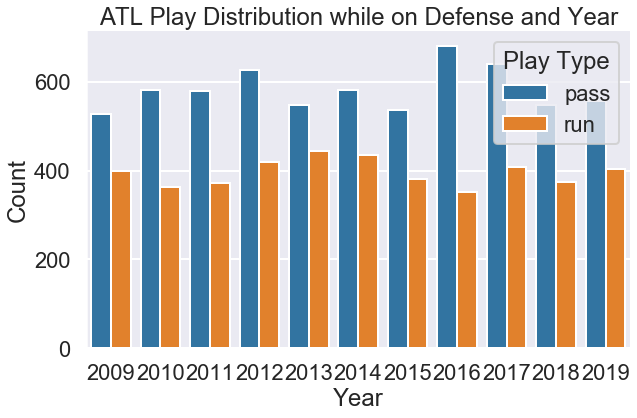

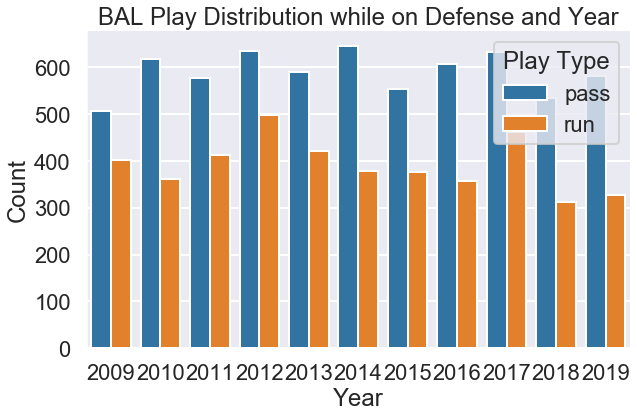

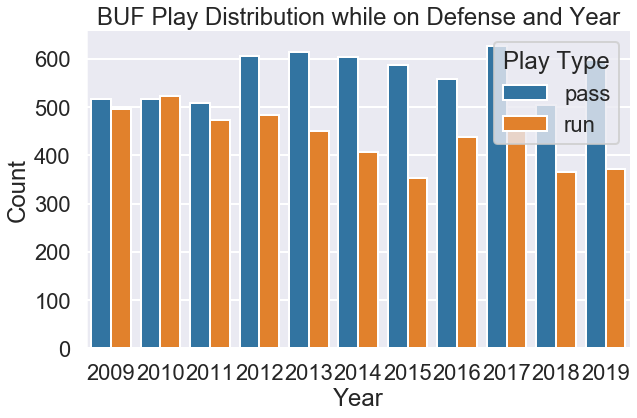

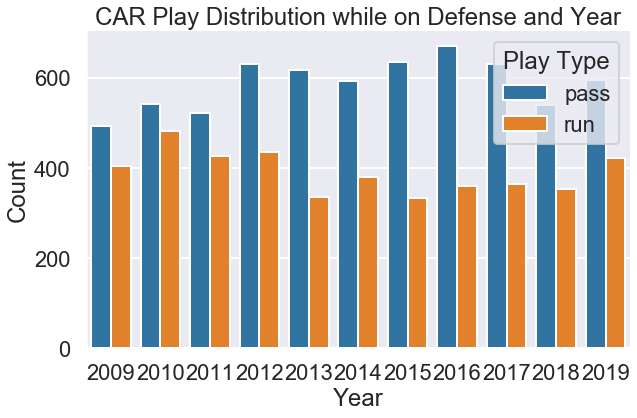

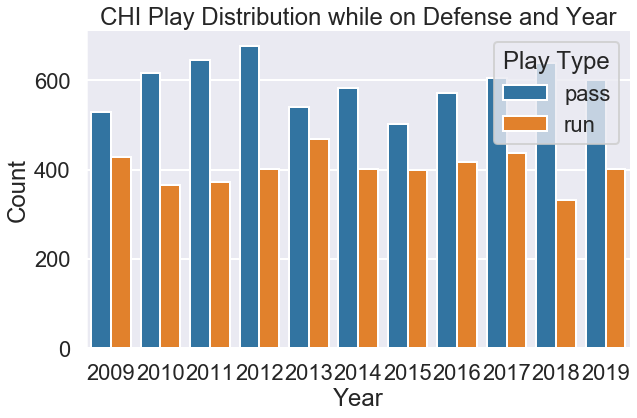

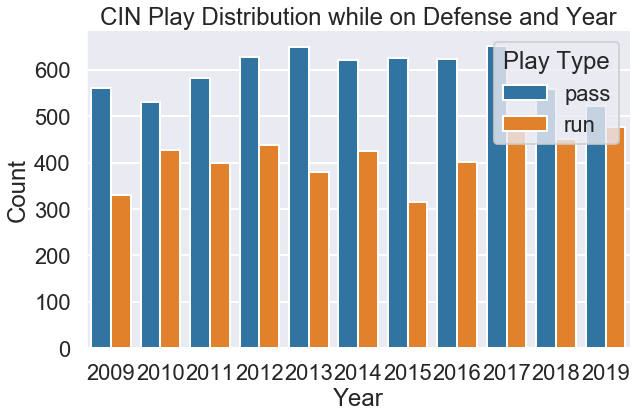

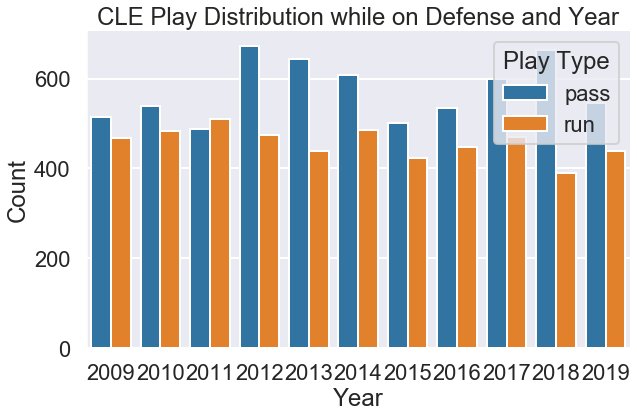

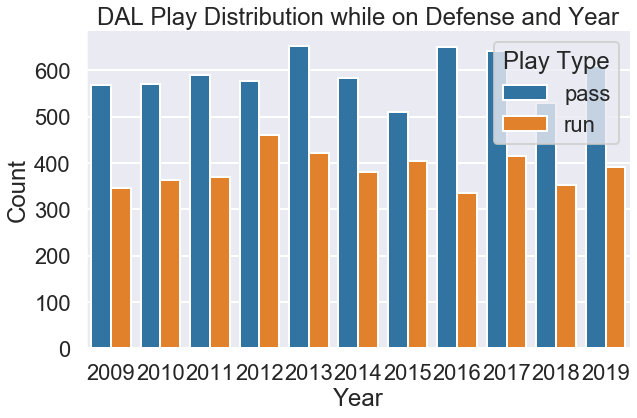

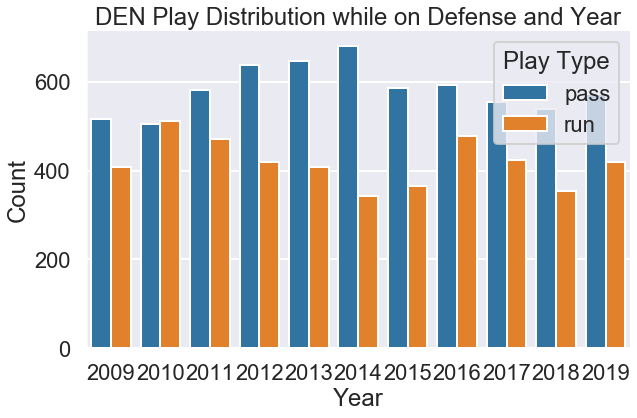

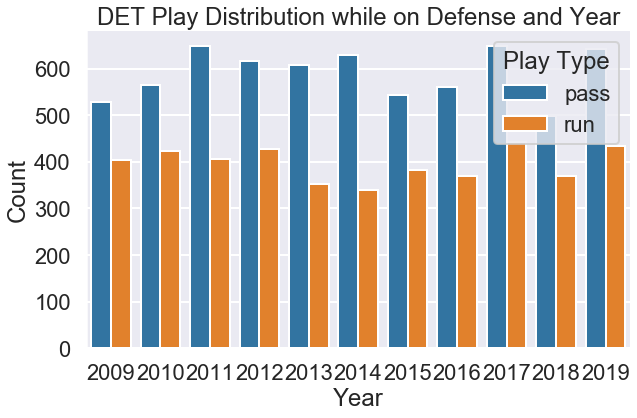

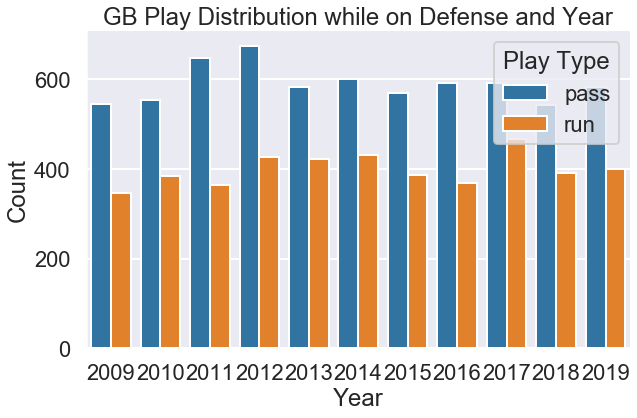

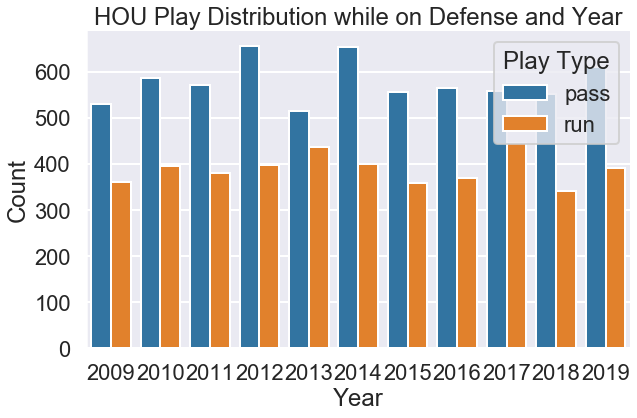

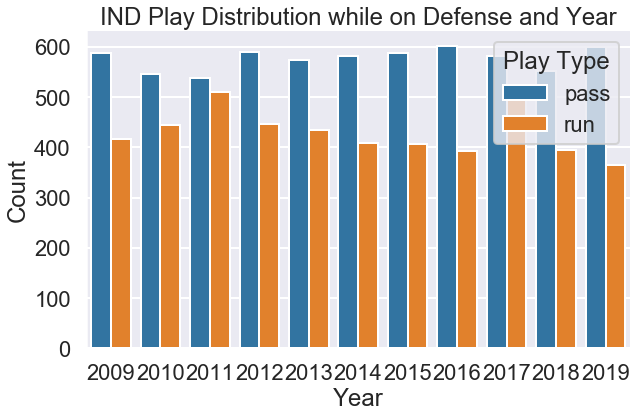

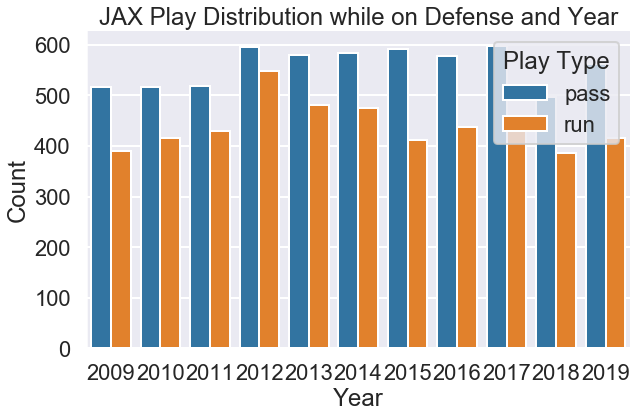

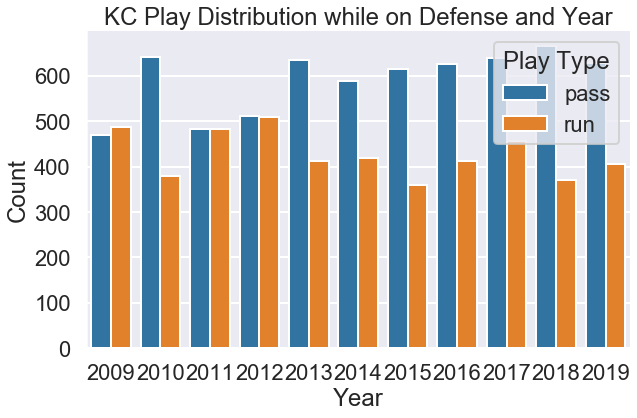

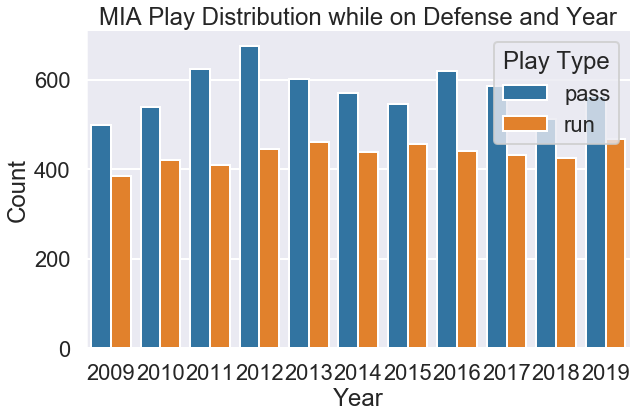

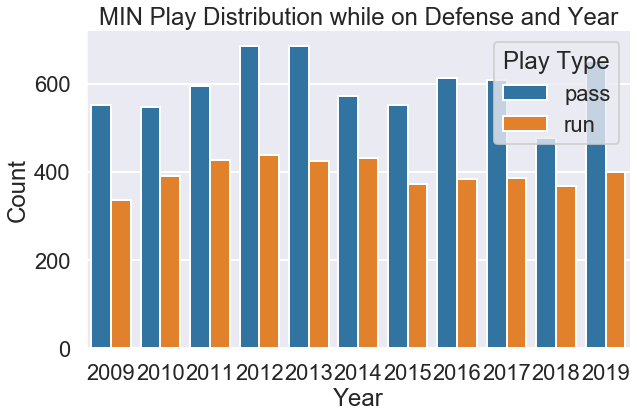

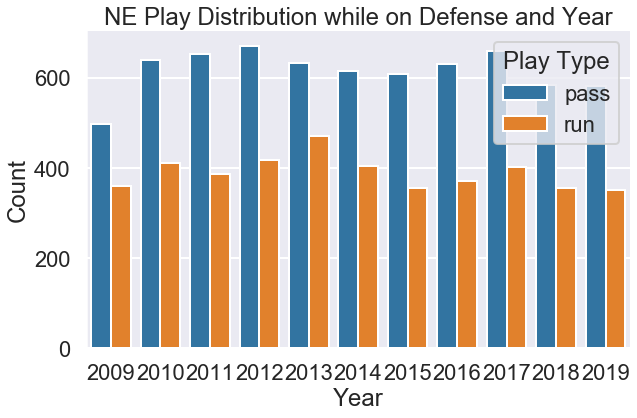

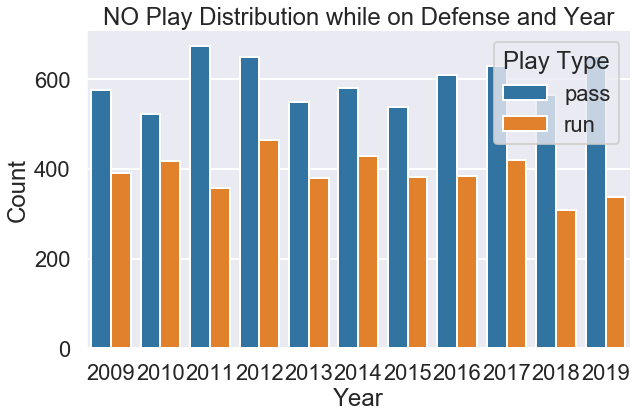

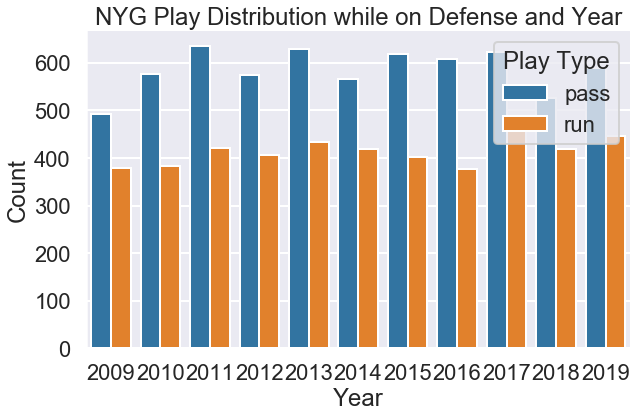

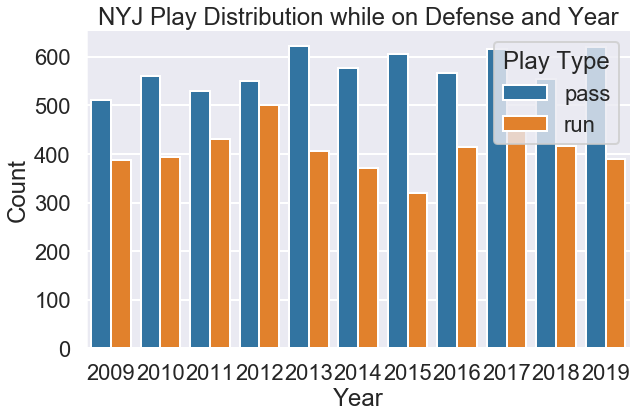

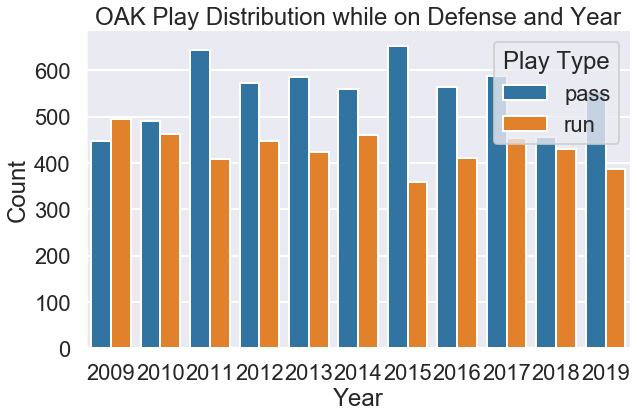

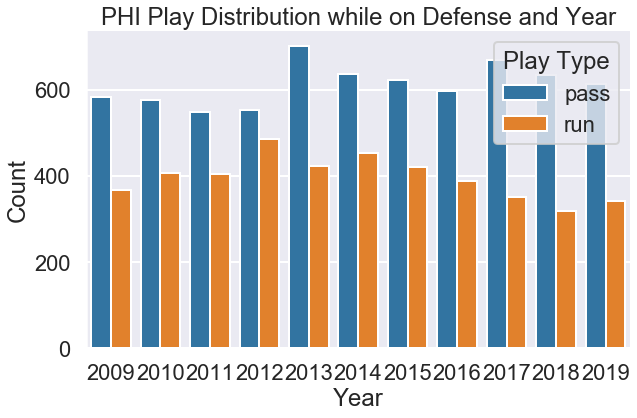

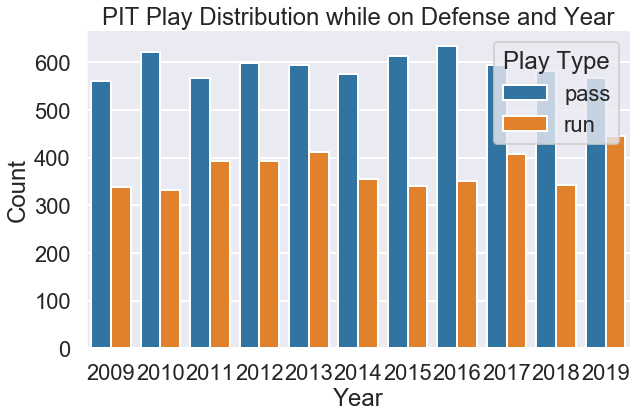

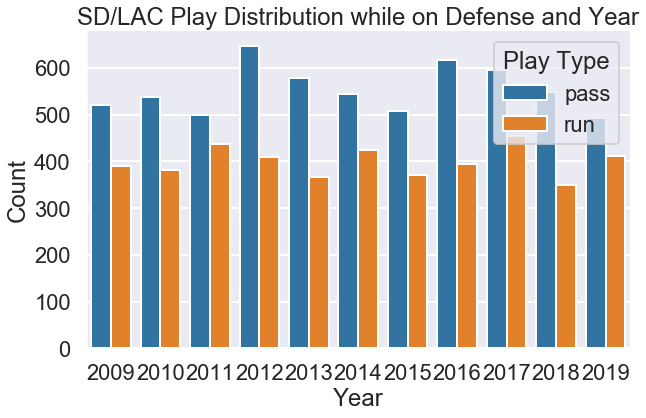

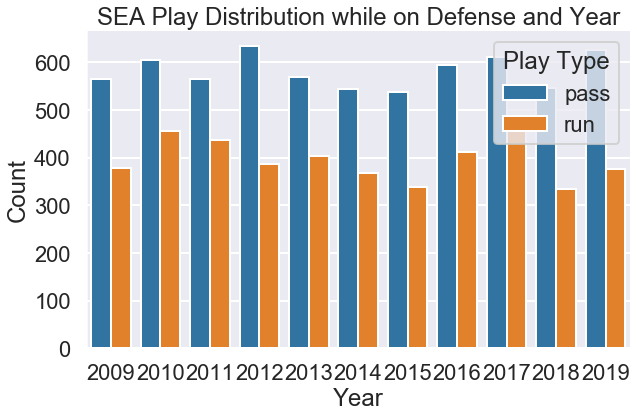

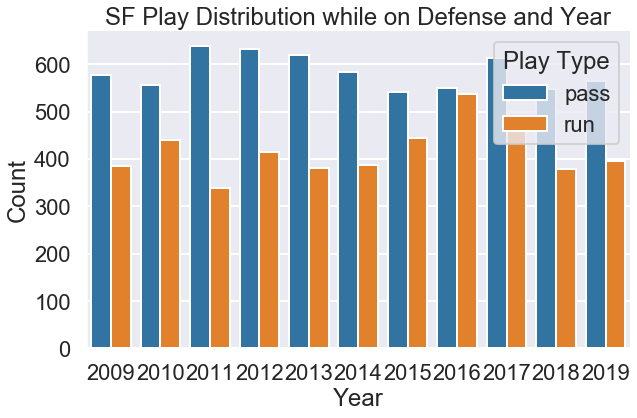

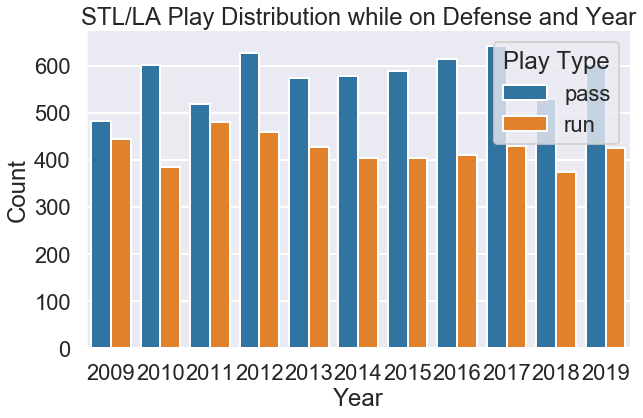

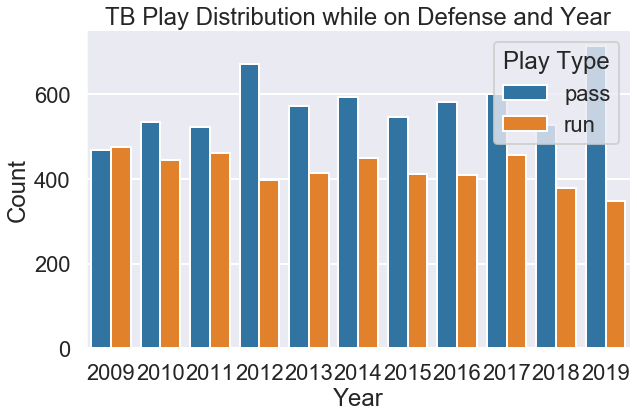

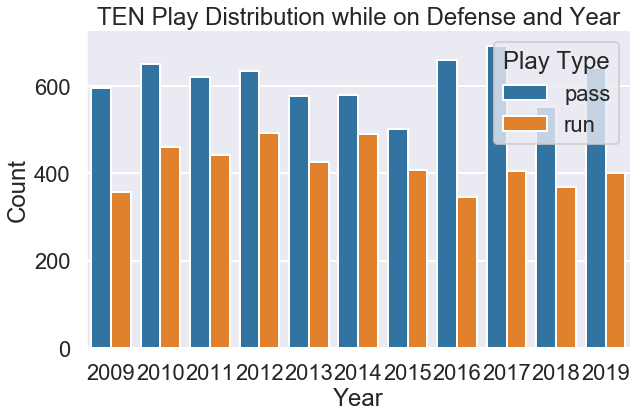

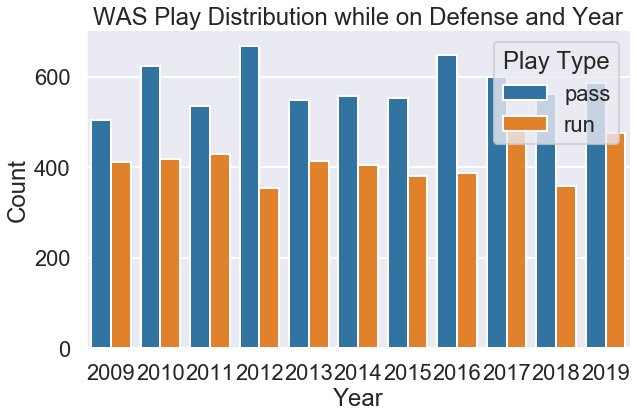

In [19]:
teams = raw_data.posteam.unique()
teams.sort()
for team in teams:
    data = raw_data[raw_data.defteam == team]
    sns.catplot(x='year', hue = 'play_type',kind = 'count', hue_order = ['pass','run'], data = data, height = 6, aspect = 1.5, legend = False)
    plt.title(team +' Play Distribution while on Defense and Year')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend(title = 'Play Type', fancybox = True, loc = 'upper right')
    plt.show()

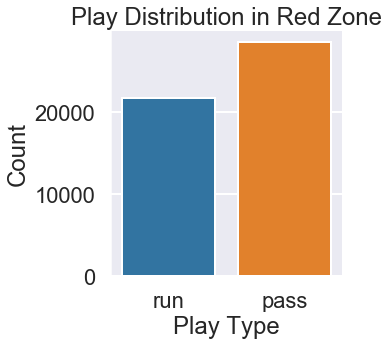

In [20]:
red_zone = raw_data[raw_data.yardline_100 >= 80]
sns.catplot(x='play_type',kind = 'count', data = red_zone)
plt.title('Play Distribution in Red Zone')
plt.xlabel('Play Type')
plt.ylabel('Count')
plt.show()

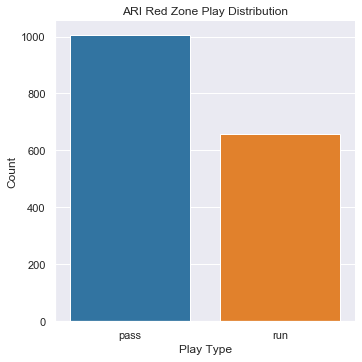

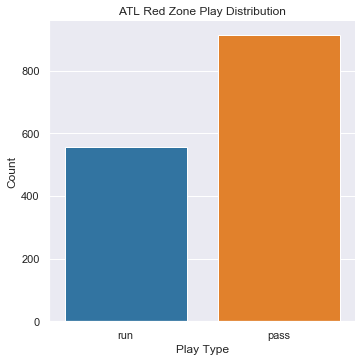

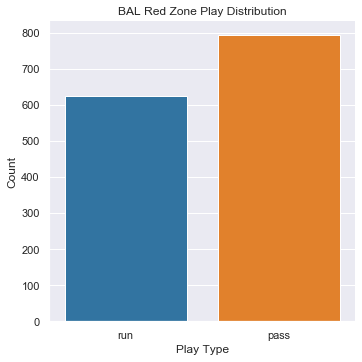

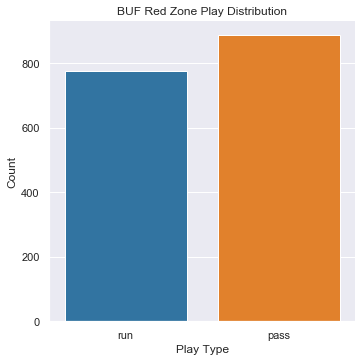

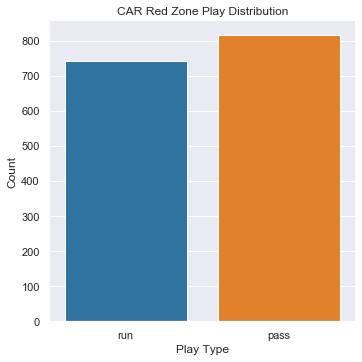

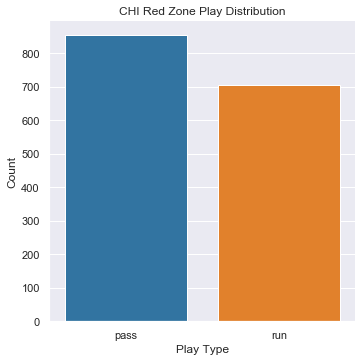

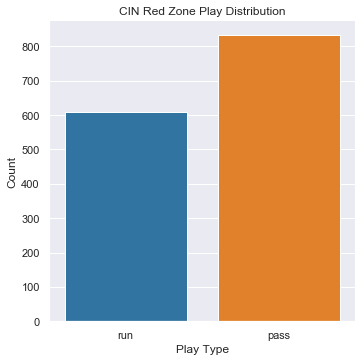

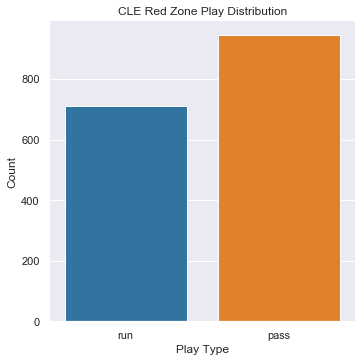

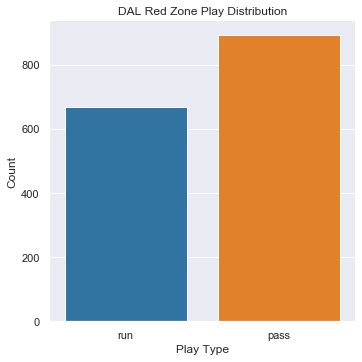

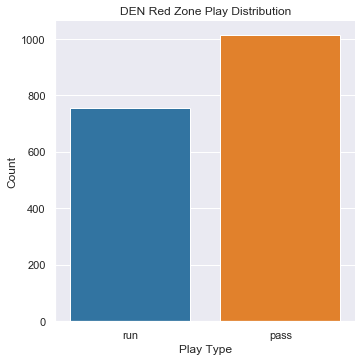

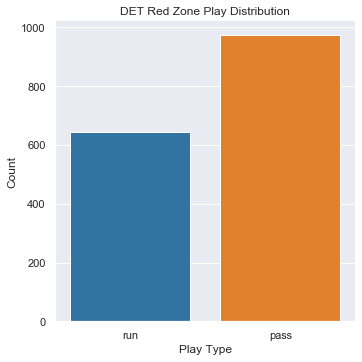

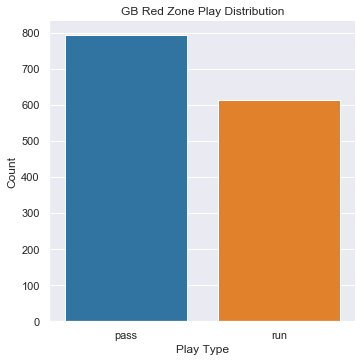

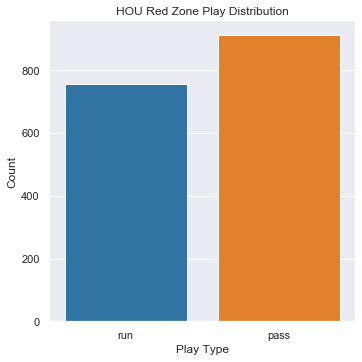

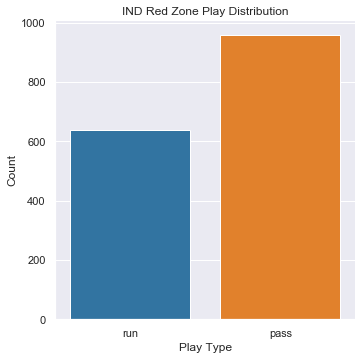

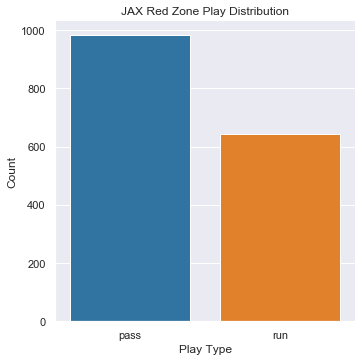

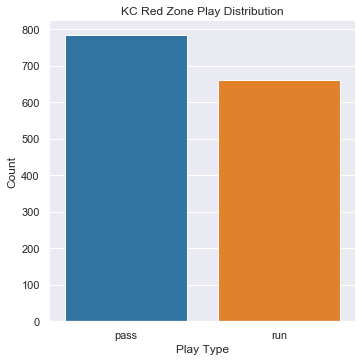

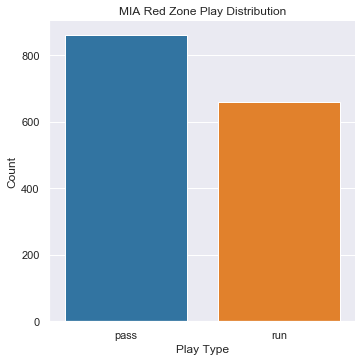

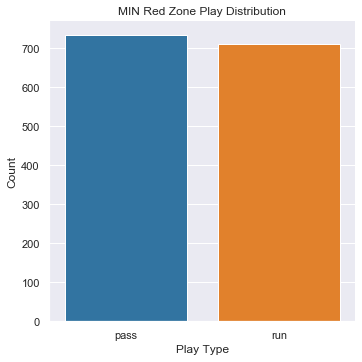

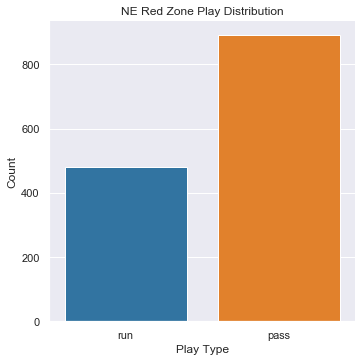

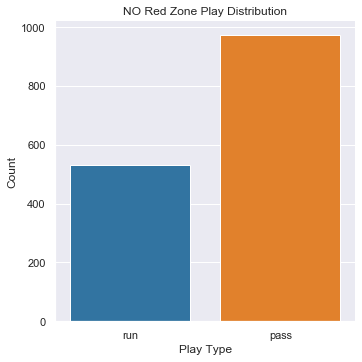

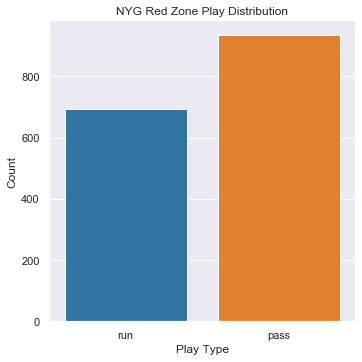

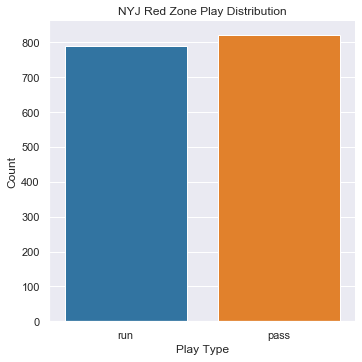

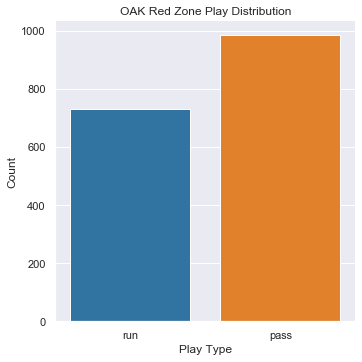

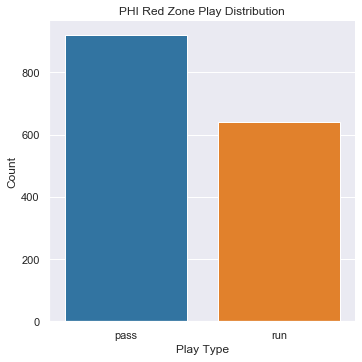

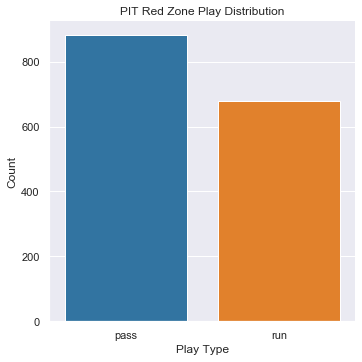

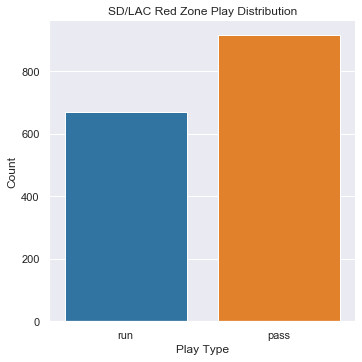

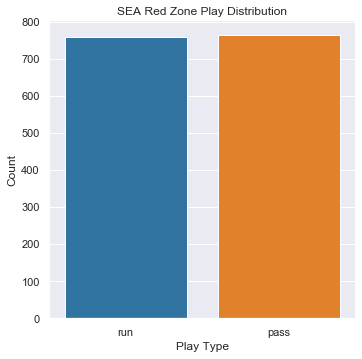

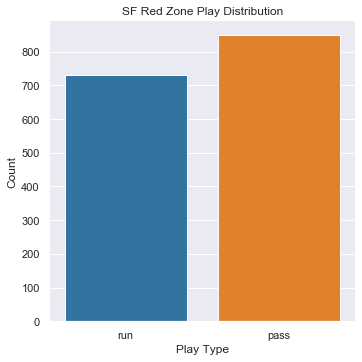

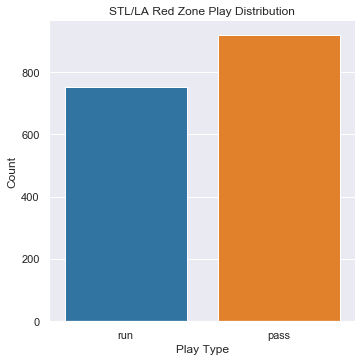

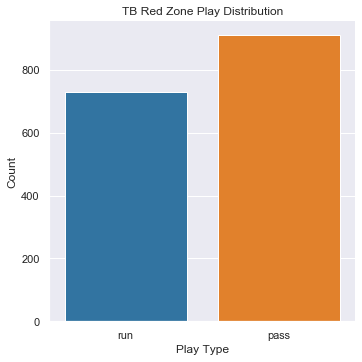

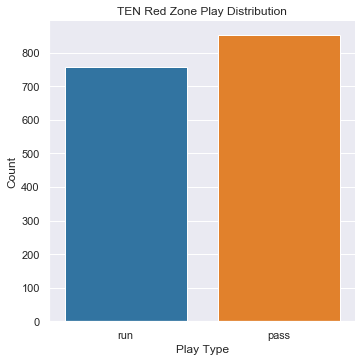

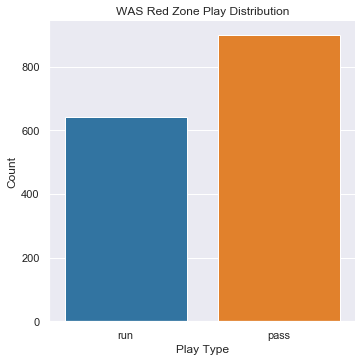

In [21]:
sns.set_context('notebook')
for team in teams:
    data = raw_data[raw_data.posteam == team]
    red_zone = data[data.yardline_100 >= 80]
    sns.catplot(x='play_type', kind = 'count', hue_order = ['pass','run'], data = red_zone, legend = False)
    plt.title(team +' Red Zone Play Distribution')
    plt.xlabel('Play Type')
    plt.ylabel('Count')
    plt.show()

# Determining Average Length of Play

In [22]:
valid_pass = pass_plays_only[pass_plays_only.yards_gained.notnull()]
valid_pass

play_id     game_id posteam defteam  yardline_100   game_date  quarter_seconds_remaining  half_seconds_remaining  game_seconds_remaining game_half  ...  defteam_timeouts_remaining  posteam_score defteam_score        wp    def_wp posteam_home side_of_field_own            scor_diff  yards_for_first_down  year
0            68  2009091000     PIT     TEN            58  2009-09-10                        893                    1793                  3593.0     Half1  ...                           3              0             0  0.546433  0.453567            1                 1                 tied                    10  2009
2           113  2009091000     PIT     TEN            56  2009-09-10                        815                    1715                  3515.0     Half1  ...                           3              0             0  0.510793  0.489207            1                 1                 tied                   7-9  2009
4           183  2009091000     TEN     PIT            98  2009-09-10                        760                    1660                  3460.0     Half1  ...                           3              0             0  0.421547  0.578453            0                 1                 tied                    10  2009
6           253  2009091000     PIT     TEN            43  2009-09-10                        684                    1584                  3384.0     Half1  ...                           3              0             0  0.591489  0.408511            1                 0                 tied                    10  2009
7           277  2009091000     PIT     TEN            40  2009-09-10                        648                    1548                  3348.0     Half1  ...                           3              0             0  0.585405  0.414595            1                 0                 tied                   7-9  2009
...         ...         ...     ...     ...           ...         ...                        ...                     ...                     ...       ...  ...                         ...            ...           ...       ...       ...          ...               ...                  ...                   ...   ...
349932     3807  2019122915     SEA      SF            12  2019-12-29                         46                      46                    46.0     Half2  ...                           2             21            26  0.161219  0.838781            1                 0  behind_by_one_score                    10  2019
349933     3877  2019122915     SEA      SF            12  2019-12-29                         42                      42                    42.0     Half2  ...                           1             21            26  0.110884  0.889116            1                 0  behind_by_one_score                    10  2019
349934     3955  2019122915     SEA      SF             5  2019-12-29                         22                      22                    22.0     Half2  ...                           1             21            26  0.235896  0.764104            1                 0  behind_by_one_score                   4-6  2019
349935     3977  2019122915     SEA      SF             5  2019-12-29                         15                      15                    15.0     Half2  ...                           1             21            26  0.068701  0.931299            1                 0  behind_by_one_score                   4-6  2019
349936     3999  2019122915     SEA      SF             5  2019-12-29                         12                      12                    12.0     Half2  ...                           1             21            26  0.026141  0.973859            1                 0  behind_by_one_score                   4-6  2019

[205636 rows x 39 columns]

In [23]:
len(valid_pass)

205636

In [24]:
avg_pass = sum(valid_pass.yards_gained) / len(valid_pass)

In [25]:
valid_run = run_plays_only[run_plays_only.yards_gained.notnull()]
valid_run

play_id     game_id posteam defteam  yardline_100   game_date  quarter_seconds_remaining  half_seconds_remaining  game_seconds_remaining game_half  ...  defteam_timeouts_remaining  posteam_score defteam_score        wp    def_wp posteam_home side_of_field_own             scor_diff  yards_for_first_down  year
1            92  2009091000     PIT     TEN            53  2009-09-10                        856                    1756                  3556.0     Half1  ...                           3              0             0  0.551088  0.448912            1                 1                  tied                   4-6  2009
3           162  2009091000     TEN     PIT            98  2009-09-10                        796                    1696                  3496.0     Half1  ...                           3              0             0  0.441071  0.558929            0                 1                  tied                    10  2009
5           207  2009091000     TEN     PIT            94  2009-09-10                        731                    1631                  3431.0     Half1  ...                           3              0             0  0.417119  0.582881            0                 1                  tied                   4-6  2009
8           301  2009091000     PIT     TEN            30  2009-09-10                        621                    1521                  3321.0     Half1  ...                           3              0             0  0.615159  0.384841            1                 0                  tied                    10  2009
11          393  2009091000     TEN     PIT            89  2009-09-10                        500                    1400                  3200.0     Half1  ...                           3              0             0  0.478927  0.521073            0                 1                  tied                    10  2009
...         ...         ...     ...     ...           ...         ...                        ...                     ...                     ...       ...  ...                         ...            ...           ...       ...       ...          ...               ...                   ...                   ...   ...
349917     3301  2019122915     SEA      SF            34  2019-12-29                        296                     296                   296.0     Half2  ...                           2             14            26  0.105675  0.894325            1                 0  behind_by_two_scores                    10  2019
349918     3358  2019122915     SEA      SF            16  2019-12-29                        257                     257                   257.0     Half2  ...                           2             14            26  0.123122  0.876878            1                 0  behind_by_two_scores                    10  2019
349920     3442  2019122915      SF     SEA            79  2019-12-29                        215                     215                   215.0     Half2  ...                           3             26            21  0.803560  0.196440            0                 1    ahead_by_one_score                    10  2019
349921     3463  2019122915      SF     SEA            76  2019-12-29                        172                     172                   172.0     Half2  ...                           3             26            21  0.822016  0.177984            0                 1    ahead_by_one_score                   7-9  2019
349937     4080  2019122915      SF     SEA            99  2019-12-29                          9                       9                     9.0     Half2  ...                           0             26            21  0.963173  0.036827            0                 1    ahead_by_one_score                    10  2019

[144093 rows x 39 columns]

In [26]:
avg_run = sum(valid_run.yards_gained) / len(valid_run)

In [27]:
print('Average Yards gained for a pass: ', avg_pass)
print('Average Yards gained for a run: ', avg_run)

Average Yards gained for a pass:  6.3197689120582
Average Yards gained for a run:  4.411865947686564


# Sample Heatmap for Football Passes

In [28]:
pass_plays_only.head()

play_id     game_id posteam defteam  yardline_100   game_date  quarter_seconds_remaining  half_seconds_remaining  game_seconds_remaining game_half  ...  defteam_timeouts_remaining  posteam_score defteam_score        wp    def_wp posteam_home side_of_field_own  scor_diff  yards_for_first_down  year
0       68  2009091000     PIT     TEN            58  2009-09-10                        893                    1793                  3593.0     Half1  ...                           3              0             0  0.546433  0.453567            1                 1       tied                    10  2009
2      113  2009091000     PIT     TEN            56  2009-09-10                        815                    1715                  3515.0     Half1  ...                           3              0             0  0.510793  0.489207            1                 1       tied                   7-9  2009
4      183  2009091000     TEN     PIT            98  2009-09-10                        760                    1660                  3460.0     Half1  ...                           3              0             0  0.421547  0.578453            0                 1       tied                    10  2009
6      253  2009091000     PIT     TEN            43  2009-09-10                        684                    1584                  3384.0     Half1  ...                           3              0             0  0.591489  0.408511            1                 0       tied                    10  2009
7      277  2009091000     PIT     TEN            40  2009-09-10                        648                    1548                  3348.0     Half1  ...                           3              0             0  0.585405  0.414595            1                 0       tied                   7-9  2009

[5 rows x 39 columns]

In [29]:
sample_game = pass_plays_only[pass_plays_only.game_id == 2009091000]
sample_game

play_id     game_id posteam defteam  yardline_100   game_date  quarter_seconds_remaining  half_seconds_remaining  game_seconds_remaining game_half  ...  defteam_timeouts_remaining  posteam_score defteam_score        wp    def_wp posteam_home side_of_field_own  scor_diff  yards_for_first_down  year
0         68  2009091000     PIT     TEN            58  2009-09-10                        893                    1793                  3593.0     Half1  ...                           3              0             0  0.546433  0.453567            1                 1       tied                    10  2009
2        113  2009091000     PIT     TEN            56  2009-09-10                        815                    1715                  3515.0     Half1  ...                           3              0             0  0.510793  0.489207            1                 1       tied                   7-9  2009
4        183  2009091000     TEN     PIT            98  2009-09-10                        760                    1660                  3460.0     Half1  ...                           3              0             0  0.421547  0.578453            0                 1       tied                    10  2009
6        253  2009091000     PIT     TEN            43  2009-09-10                        684                    1584                  3384.0     Half1  ...                           3              0             0  0.591489  0.408511            1                 0       tied                    10  2009
7        277  2009091000     PIT     TEN            40  2009-09-10                        648                    1548                  3348.0     Half1  ...                           3              0             0  0.585405  0.414595            1                 0       tied                   7-9  2009
..       ...         ...     ...     ...           ...         ...                        ...                     ...                     ...       ...  ...                         ...            ...           ...       ...       ...          ...               ...        ...                   ...   ...
124     4065  2009091000     PIT     TEN            67  2009-09-10                        870                     870                   870.0  Overtime  ...                           2             10            10  0.639180  0.360820            1                 1       tied                    10  2009
127     4135  2009091000     PIT     TEN            56  2009-09-10                        765                     765                   765.0  Overtime  ...                           2             10            10  0.668586  0.331414            1                 1       tied                   7-9  2009
128     4159  2009091000     PIT     TEN            48  2009-09-10                        722                     722                   722.0  Overtime  ...                           2             10            10  0.737421  0.262579            1                 0       tied                   0-3  2009
129     4183  2009091000     PIT     TEN            37  2009-09-10                        681                     681                   681.0  Overtime  ...                           2             10            10  0.824886  0.175114            1                 0       tied                    10  2009
130     4209  2009091000     PIT     TEN            37  2009-09-10                        674                     674                   674.0  Overtime  ...                           2             10            10  0.792728  0.207272            1                 0       tied                    10  2009

[83 rows x 39 columns]

In [30]:
sample_game_pit = sample_game[sample_game.posteam == 'PIT']
sample_game_pit

play_id     game_id posteam defteam  yardline_100   game_date  quarter_seconds_remaining  half_seconds_remaining  game_seconds_remaining game_half  ...  defteam_timeouts_remaining  posteam_score defteam_score        wp    def_wp posteam_home side_of_field_own            scor_diff  yards_for_first_down  year
0         68  2009091000     PIT     TEN            58  2009-09-10                        893                    1793                  3593.0     Half1  ...                           3              0             0  0.546433  0.453567            1                 1                 tied                    10  2009
2        113  2009091000     PIT     TEN            56  2009-09-10                        815                    1715                  3515.0     Half1  ...                           3              0             0  0.510793  0.489207            1                 1                 tied                   7-9  2009
6        253  2009091000     PIT     TEN            43  2009-09-10                        684                    1584                  3384.0     Half1  ...                           3              0             0  0.591489  0.408511            1                 0                 tied                    10  2009
7        277  2009091000     PIT     TEN            40  2009-09-10                        648                    1548                  3348.0     Half1  ...                           3              0             0  0.585405  0.414595            1                 0                 tied                   7-9  2009
9        322  2009091000     PIT     TEN            31  2009-09-10                        583                    1483                  3283.0     Half1  ...                           3              0             0  0.597822  0.402178            1                 0                 tied                 11-15  2009
10       346  2009091000     PIT     TEN            22  2009-09-10                        541                    1441                  3241.0     Half1  ...                           3              0             0  0.607521  0.392479            1                 0                 tied                   0-3  2009
18       584  2009091000     PIT     TEN            70  2009-09-10                        327                    1227                  3027.0     Half1  ...                           3              0             0  0.491891  0.508109            1                 1                 tied                   7-9  2009
27       842  2009091000     PIT     TEN            76  2009-09-10                         12                     912                  2712.0     Half1  ...                           3              0             0  0.456089  0.543911            1                 1                 tied                   7-9  2009
33      1017  2009091000     PIT     TEN            95  2009-09-10                        784                     784                  2584.0     Half1  ...                           3              0             0  0.447645  0.552355            1                 1                 tied                    10  2009
35      1062  2009091000     PIT     TEN            87  2009-09-10                        699                     699                  2499.0     Half1  ...                           3              0             0  0.454526  0.545474            1                 1                 tied                   0-3  2009
36      1086  2009091000     PIT     TEN            79  2009-09-10                        659                     659                  2459.0     Half1  ...                           3              0             0  0.496017  0.503983            1                 1                 tied                    10  2009
38      1191  2009091000     PIT     TEN            85  2009-09-10                        583                     583                  2383.0     Half1  ...                           3              0             0  0.461757  0.538243    

In [31]:
sample_game_pit.air_yards.value_counts()

 0.0     8
 7.0     4
 3.0     4
-2.0     3
 5.0     3
 9.0     2
 34.0    2
 4.0     2
-1.0     2
 14.0    2
 16.0    2
 8.0     2
 22.0    1
 20.0    1
 13.0    1
 17.0    1
 12.0    1
 24.0    1
 23.0    1
 55.0    1
 6.0     1
-4.0     1
-3.0     1
Name: air_yards, dtype: int64

In [32]:
sample_game_pit[sample_game_pit.air_yards == -2.0].desc

6      (11:24) B.Roethlisberger pass short right to M...
9      (9:43) B.Roethlisberger pass short right to H....
108    (5:10) (No Huddle, Shotgun) B.Roethlisberger p...
Name: desc, dtype: object

In [33]:
sample_game_pit.pass_length.value_counts()

short       33
deep        10
no throw     4
Name: pass_length, dtype: int64

In [34]:
sample_game_pit.pass_location.value_counts()

left        19
right       14
middle      10
no throw     4
Name: pass_location, dtype: int64

In [35]:
def pass_location(yards, location):
    if location != 'no throw':
        if yards <= 5:
            return 'short'
        if yards > 5 and yards < 15:
            return 'medium'
        if yards >= 15:
            return 'deep'
    else:
        return 'sacked'

In [36]:
pass_location(15,'right')

'deep'

In [37]:
sample_game_pit['pass_distance'] = sample_game_pit.apply(lambda x: pass_location(x['air_yards'],x['pass_location']), axis = 1)

C:\Users\msf89\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [152]:
sample_game_pit.pass_distance.value_counts()

short     20
medium    13
deep      10
sacked     4
Name: pass_distance, dtype: int64

In [153]:
a = sample_game_pit[sample_game_pit.pass_distance != 'sacked']
a

play_id     game_id posteam defteam  yardline_100   game_date  quarter_seconds_remaining  half_seconds_remaining  game_seconds_remaining game_half  ...  posteam_score  defteam_score        wp    def_wp  posteam_home side_of_field_own            scor_diff  yards_for_first_down  year  pass_distance
0         68  2009091000     PIT     TEN            58  2009-09-10                        893                    1793                  3593.0     Half1  ...              0              0  0.546433  0.453567             1                 1                 tied                    10  2009          short
2        113  2009091000     PIT     TEN            56  2009-09-10                        815                    1715                  3515.0     Half1  ...              0              0  0.510793  0.489207             1                 1                 tied                   7-9  2009           deep
6        253  2009091000     PIT     TEN            43  2009-09-10                        684                    1584                  3384.0     Half1  ...              0              0  0.591489  0.408511             1                 0                 tied                    10  2009          short
7        277  2009091000     PIT     TEN            40  2009-09-10                        648                    1548                  3348.0     Half1  ...              0              0  0.585405  0.414595             1                 0                 tied                   7-9  2009          short
9        322  2009091000     PIT     TEN            31  2009-09-10                        583                    1483                  3283.0     Half1  ...              0              0  0.597822  0.402178             1                 0                 tied                 11-15  2009          short
27       842  2009091000     PIT     TEN            76  2009-09-10                         12                     912                  2712.0     Half1  ...              0              0  0.456089  0.543911             1                 1                 tied                   7-9  2009           deep
33      1017  2009091000     PIT     TEN            95  2009-09-10                        784                     784                  2584.0     Half1  ...              0              0  0.447645  0.552355             1                 1                 tied                    10  2009          short
35      1062  2009091000     PIT     TEN            87  2009-09-10                        699                     699                  2499.0     Half1  ...              0              0  0.454526  0.545474             1                 1                 tied                   0-3  2009          short
36      1086  2009091000     PIT     TEN            79  2009-09-10                        659                     659                  2459.0     Half1  ...              0              0  0.496017  0.503983             1                 1                 tied                    10  2009         medium
38      1191  2009091000     PIT     TEN            85  2009-09-10                        583                     583                  2383.0     Half1  ...              0              0  0.461757  0.538243             1                 1                 tied                   16+  2009           deep
41      1257  2009091000     PIT     TEN            62  2009-09-10                        452                     452                  2252.0     Half1  ...              0              0  0.520211  0.479789             1                 1                 tied                   4-6  2009         medium
53      1653  2009091000     PIT     TEN            79  2009-09-10                        134                     134                  1934.0     Half1  ...              0              0  0.503413  0.496587             1                 1                 tied                    10  2009           deep
54      1679  2009091000     PIT     TEN            79  2009-09-10

In [154]:
array = [[0,0,0],
         [0,0,0],
         [0,0,0]]
print(array)

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]


In [155]:
def pass_heatmap(length,location):
    if location =='left':
        if length == 'short':
            array[2][0] += 1
        if length == 'medium':
            array[1][0] += 1
        if length == 'deep':
            array[0][0] += 1
            
    if location =='middle':
        if length == 'short':
            array[2][1] += 1
        if length == 'medium':
            array[1][1] += 1
        if length == 'deep':
            array[0][1] += 1
            
    if location == 'right':
        if length == 'short':
            array[2][2] += 1
        if length == 'medium':
            array[1][2] += 1
        if length == 'deep':
            array[0][2] += 1

In [156]:
a

play_id     game_id posteam defteam  yardline_100   game_date  quarter_seconds_remaining  half_seconds_remaining  game_seconds_remaining game_half  ...  posteam_score  defteam_score        wp    def_wp  posteam_home side_of_field_own            scor_diff  yards_for_first_down  year  pass_distance
0         68  2009091000     PIT     TEN            58  2009-09-10                        893                    1793                  3593.0     Half1  ...              0              0  0.546433  0.453567             1                 1                 tied                    10  2009          short
2        113  2009091000     PIT     TEN            56  2009-09-10                        815                    1715                  3515.0     Half1  ...              0              0  0.510793  0.489207             1                 1                 tied                   7-9  2009           deep
6        253  2009091000     PIT     TEN            43  2009-09-10                        684                    1584                  3384.0     Half1  ...              0              0  0.591489  0.408511             1                 0                 tied                    10  2009          short
7        277  2009091000     PIT     TEN            40  2009-09-10                        648                    1548                  3348.0     Half1  ...              0              0  0.585405  0.414595             1                 0                 tied                   7-9  2009          short
9        322  2009091000     PIT     TEN            31  2009-09-10                        583                    1483                  3283.0     Half1  ...              0              0  0.597822  0.402178             1                 0                 tied                 11-15  2009          short
27       842  2009091000     PIT     TEN            76  2009-09-10                         12                     912                  2712.0     Half1  ...              0              0  0.456089  0.543911             1                 1                 tied                   7-9  2009           deep
33      1017  2009091000     PIT     TEN            95  2009-09-10                        784                     784                  2584.0     Half1  ...              0              0  0.447645  0.552355             1                 1                 tied                    10  2009          short
35      1062  2009091000     PIT     TEN            87  2009-09-10                        699                     699                  2499.0     Half1  ...              0              0  0.454526  0.545474             1                 1                 tied                   0-3  2009          short
36      1086  2009091000     PIT     TEN            79  2009-09-10                        659                     659                  2459.0     Half1  ...              0              0  0.496017  0.503983             1                 1                 tied                    10  2009         medium
38      1191  2009091000     PIT     TEN            85  2009-09-10                        583                     583                  2383.0     Half1  ...              0              0  0.461757  0.538243             1                 1                 tied                   16+  2009           deep
41      1257  2009091000     PIT     TEN            62  2009-09-10                        452                     452                  2252.0     Half1  ...              0              0  0.520211  0.479789             1                 1                 tied                   4-6  2009         medium
53      1653  2009091000     PIT     TEN            79  2009-09-10                        134                     134                  1934.0     Half1  ...              0              0  0.503413  0.496587             1                 1                 tied                    10  2009           deep
54      1679  2009091000     PIT     TEN            79  2009-09-10

In [157]:
a.apply(lambda x: pass_heatmap(x.pass_distance,x.pass_location), axis = 1)
#pass_heatmap(a.pass_length, a.pass_location)
print(array)

[[2, 5, 3], [8, 3, 2], [9, 2, 9]]


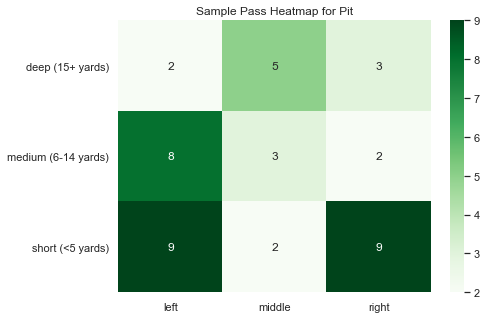

In [163]:
plt.figure(figsize = (7,5))
sns.heatmap(data = array, xticklabels = ['left','middle','right'], 
            yticklabels = ['deep (15+ yards)', 'medium (6-14 yards)', 'short (<5 yards)'], 
            annot = True, cmap= 'Greens')
plt.title('Sample Pass Heatmap for Pit')
plt.show()

# Sample Heatmap for Run Plays

In [45]:
sample_game_2 = run_plays_only[run_plays_only.game_id == 2009091000]
sample_game_2

play_id     game_id posteam defteam  yardline_100   game_date  quarter_seconds_remaining  half_seconds_remaining  game_seconds_remaining game_half  ...  defteam_timeouts_remaining  posteam_score defteam_score        wp    def_wp posteam_home side_of_field_own            scor_diff  yards_for_first_down  year
1         92  2009091000     PIT     TEN            53  2009-09-10                        856                    1756                  3556.0     Half1  ...                           3              0             0  0.551088  0.448912            1                 1                 tied                   4-6  2009
3        162  2009091000     TEN     PIT            98  2009-09-10                        796                    1696                  3496.0     Half1  ...                           3              0             0  0.441071  0.558929            0                 1                 tied                    10  2009
5        207  2009091000     TEN     PIT            94  2009-09-10                        731                    1631                  3431.0     Half1  ...                           3              0             0  0.417119  0.582881            0                 1                 tied                   4-6  2009
8        301  2009091000     PIT     TEN            30  2009-09-10                        621                    1521                  3321.0     Half1  ...                           3              0             0  0.615159  0.384841            1                 0                 tied                    10  2009
11       393  2009091000     TEN     PIT            89  2009-09-10                        500                    1400                  3200.0     Half1  ...                           3              0             0  0.478927  0.521073            0                 1                 tied                    10  2009
13       449  2009091000     TEN     PIT            22  2009-09-10                        444                    1344                  3144.0     Half1  ...                           3              0             0  0.631203  0.368797            0                 0                 tied                    10  2009
16       542  2009091000     PIT     TEN            73  2009-09-10                        404                    1304                  3104.0     Half1  ...                           3              0             0  0.528421  0.471579            1                 1                 tied                    10  2009
17       563  2009091000     PIT     TEN            72  2009-09-10                        369                    1269                  3069.0     Half1  ...                           3              0             0  0.511082  0.488918            1                 1                 tied                   7-9  2009
21       705  2009091000     TEN     PIT            60  2009-09-10                        225                    1125                  2925.0     Half1  ...                           3              0             0  0.545367  0.454633            0                 1                 tied                   4-6  2009
25       800  2009091000     PIT     TEN            79  2009-09-10                         98                     998                  2798.0     Half1  ...                           3              0             0  0.496586  0.503414            1                 1                 tied                    10  2009
26       821  2009091000     PIT     TEN            77  2009-09-10                         57                     957                  2757.0     Half1  ...                           3              0             0  0.480678  0.519322            1                 1                 tied                   7-9  2009
28       868  2009091000     TEN     PIT            44  2009-09-10                          6                     906                  2706.0     Half1  ...                           3              0             0  0.578681  0.421319    

In [46]:
sample_game_pit_2 = sample_game_2[sample_game_2.posteam == 'PIT']
sample_game_pit_2

play_id     game_id posteam defteam  yardline_100   game_date  quarter_seconds_remaining  half_seconds_remaining  game_seconds_remaining game_half  ...  defteam_timeouts_remaining  posteam_score defteam_score        wp    def_wp posteam_home side_of_field_own            scor_diff  yards_for_first_down  year
1         92  2009091000     PIT     TEN            53  2009-09-10                        856                    1756                  3556.0     Half1  ...                           3              0             0  0.551088  0.448912            1                 1                 tied                   4-6  2009
8        301  2009091000     PIT     TEN            30  2009-09-10                        621                    1521                  3321.0     Half1  ...                           3              0             0  0.615159  0.384841            1                 0                 tied                    10  2009
16       542  2009091000     PIT     TEN            73  2009-09-10                        404                    1304                  3104.0     Half1  ...                           3              0             0  0.528421  0.471579            1                 1                 tied                    10  2009
17       563  2009091000     PIT     TEN            72  2009-09-10                        369                    1269                  3069.0     Half1  ...                           3              0             0  0.511082  0.488918            1                 1                 tied                   7-9  2009
25       800  2009091000     PIT     TEN            79  2009-09-10                         98                     998                  2798.0     Half1  ...                           3              0             0  0.496586  0.503414            1                 1                 tied                    10  2009
26       821  2009091000     PIT     TEN            77  2009-09-10                         57                     957                  2757.0     Half1  ...                           3              0             0  0.480678  0.519322            1                 1                 tied                   7-9  2009
34      1041  2009091000     PIT     TEN            87  2009-09-10                        743                     743                  2543.0     Half1  ...                           3              0             0  0.472069  0.527931            1                 1                 tied                   0-3  2009
37      1110  2009091000     PIT     TEN            70  2009-09-10                        619                     619                  2419.0     Half1  ...                           3              0             0  0.534518  0.465482            1                 1                 tied                   0-3  2009
39      1215  2009091000     PIT     TEN            67  2009-09-10                        539                     539                  2339.0     Half1  ...                           3              0             0  0.535498  0.464502            1                 1                 tied                    10  2009
40      1236  2009091000     PIT     TEN            66  2009-09-10                        498                     498                  2298.0     Half1  ...                           3              0             0  0.523406  0.476594            1                 1                 tied                   7-9  2009
73      2380  2009091000     PIT     TEN            54  2009-09-10                        717                    1617                  1617.0     Half2  ...                           3              7             7  0.574091  0.425909            1                 1                 tied                    10  2009
74      2401  2009091000     PIT     TEN            46  2009-09-10                        680                    1580                  1580.0     Half2  ...                           3              7             7  0.596120  0.403880    

In [47]:
sample_game_pit_2.run_gap.value_counts()

guard     9
middle    6
tackle    5
end       3
Name: run_gap, dtype: int64

In [48]:
sample_game_pit_2.run_location.value_counts()

right     13
middle     6
left       4
Name: run_location, dtype: int64

In [49]:
run_array = [0,0,0,0,0,0,0]

In [50]:
def run_heatmap(location,gap):
    if location =='left':
        if gap == 'end':
            run_array[0] += 1
        if gap == 'tackle':
            run_array[1] += 1
        if gap == 'guard':
            run_array[2] += 1
            
    if location =='middle':
        run_array[3] += 1
            
    if location == 'right':
        if gap == 'end':
            run_array[6] += 1
        if gap == 'tackle':
            run_array[5] += 1
        if gap == 'guard':
            run_array[4] += 1

In [51]:
sample_game_pit_2.apply(lambda x: run_heatmap(x.run_location,x.run_gap), axis = 1)
#pass_heatmap(a.pass_length, a.pass_location)
print(run_array)

[1, 2, 1, 6, 8, 3, 2]


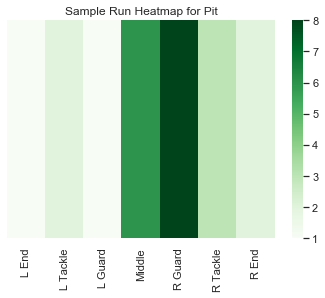

In [149]:
sns.heatmap([run_array], xticklabels=['L End', 'L Tackle', 'L Guard', 'Middle', 'R Guard', 'R Tackle', 'R End'],
           cmap= 'Greens',yticklabels = [''])
plt.title('Sample Run Heatmap for Pit')
plt.show()

# Plot Heatmaps for Entire Season

In [53]:
pit_pass_plays = pass_plays_only[pass_plays_only.posteam == 'PIT']
pit_pass_plays_2019 = pit_pass_plays[pit_pass_plays.year == '2019']
pit_pass_plays_2019

play_id     game_id posteam defteam  yardline_100   game_date  quarter_seconds_remaining  half_seconds_remaining  game_seconds_remaining game_half  ...  defteam_timeouts_remaining  posteam_score defteam_score        wp    def_wp posteam_home side_of_field_own             scor_diff  yards_for_first_down  year
319597      243  2019090812     PIT      NE            84  2019-09-08                        676                    1576                  3376.0     Half1  ...                           3              0             0  0.471670  0.528330            0                 1                  tied                   4-6  2019
319598      267  2019090812     PIT      NE            77  2019-09-08                        638                    1538                  3338.0     Half1  ...                           3              0             0  0.508410  0.491590            0                 1                  tied                    10  2019
319602      360  2019090812     PIT      NE            61  2019-09-08                        487                    1387                  3187.0     Half1  ...                           3              0             0  0.516602  0.483398            0                 1                  tied                   4-6  2019
319611      688  2019090812     PIT      NE            83  2019-09-08                        215                    1115                  2915.0     Half1  ...                           3              0             7  0.238978  0.761022            0                 1   behind_by_one_score                   16+  2019
319612      748  2019090812     PIT      NE            85  2019-09-08                        185                    1085                  2885.0     Half1  ...                           3              0             7  0.205653  0.794347            0                 1   behind_by_one_score                   16+  2019
...         ...         ...     ...     ...           ...         ...                        ...                     ...                     ...       ...  ...                         ...            ...           ...       ...       ...          ...               ...                   ...                   ...   ...
349421     2924  2019122900     PIT     BAL            50  2019-12-29                        695                     695                   695.0     Half2  ...                           3             10            19  0.248648  0.751352            0                 0  behind_by_two_scores                   4-6  2019
349431     3314  2019122900     PIT     BAL            81  2019-12-29                        294                     294                   294.0     Half2  ...                           2             10            19  0.125348  0.874652            0                 1  behind_by_two_scores                    10  2019
349432     3336  2019122900     PIT     BAL            81  2019-12-29                        290                     290                   290.0     Half2  ...                           2             10            19  0.112447  0.887553            0                 1  behind_by_two_scores                    10  2019
349433     3358  2019122900     PIT     BAL            81  2019-12-29                        286                     286                   286.0     Half2  ...                           2             10            19  0.098254  0.901746            0                 1  behind_by_two_scores                    10  2019
349434     3467  2019122900     PIT     BAL            94  2019-12-29                        272                     272                   272.0     Half2  ...                           2             10            26  0.023090  0.976910            0                 1  behind_by_two_scores                    10  2019

[540 rows x 39 columns]

In [54]:
game_ids = list(pit_pass_plays_2019.game_id.unique())
game_ids

[2019090812,
 2019091507,
 2019092212,
 2019093000,
 2019100607,
 2019101311,
 2019102800,
 2019110306,
 2019111009,
 2019111400,
 2019112403,
 2019120110,
 2019120810,
 2019121506,
 2019122209,
 2019122900]

In [55]:
def pass_heatmap(length,location, array):
    if location =='left':
        if length == 'short':
            array[2][0] += 1
        if length == 'medium':
            array[1][0] += 1
        if length == 'deep':
            array[0][0] += 1
            
    if location =='middle':
        if length == 'short':
            array[2][1] += 1
        if length == 'medium':
            array[1][1] += 1
        if length == 'deep':
            array[0][1] += 1
            
    if location == 'right':
        if length == 'short':
            array[2][2] += 1
        if length == 'medium':
            array[1][2] += 1
        if length == 'deep':
            array[0][2] += 1

In [56]:
array = [[0,0,0],[0,0,0],[0,0,0]]

In [57]:
def plot_pass_year(team,year):
    team_pass_plays = pass_plays_only[pass_plays_only.posteam == team]
    team_pass_plays_year = team_pass_plays[team_pass_plays.year == year]
    game_ids = list(team_pass_plays_year.game_id.unique())
    
    for game in game_ids:
        array = [[0,0,0],[0,0,0],[0,0,0]]
        game_of_week = team_pass_plays[team_pass_plays.game_id == game]
        opponent = game_of_week.defteam.unique()
        game_of_week['pass_distance'] = game_of_week.apply(lambda x: pass_location(x['air_yards'],x['pass_location']), axis = 1)
        non_sacked_plays = game_of_week[game_of_week.pass_distance != 'sacked']
        
        non_sacked_plays.apply(lambda x: pass_heatmap(x.pass_distance,x.pass_location,array), axis = 1)
       # Plot results
        sns.heatmap(data = array, xticklabels = ['left','middle','right'], 
        yticklabels = ['deep (15+ yards)', 'medium (6-14 yards)', 'short (<5 yards)'], 
        annot = True, cmap= 'Greens')
        plt.title('Pass Heatmap Against ' + opponent)
        plt.show()

C:\Users\msf89\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


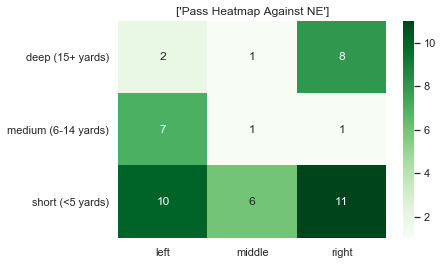

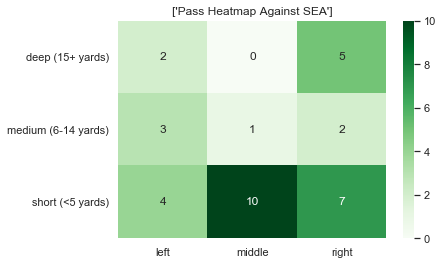

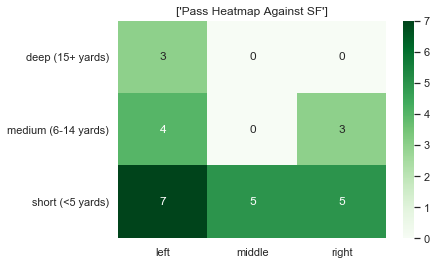

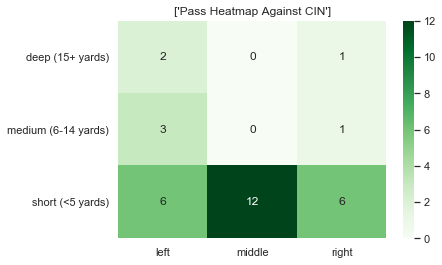

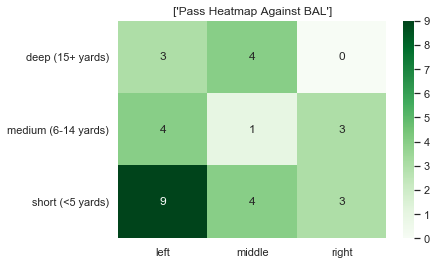

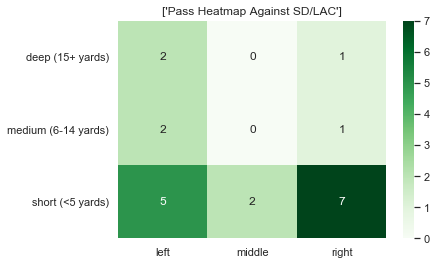

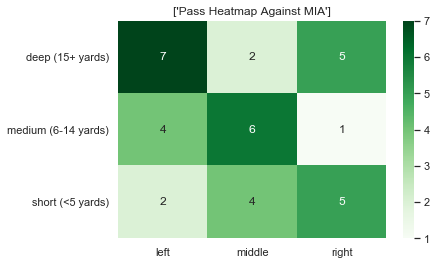

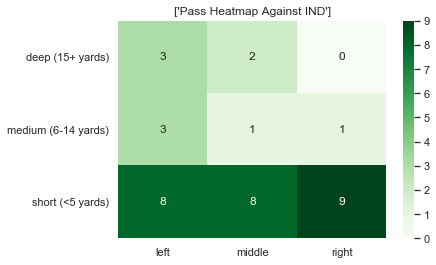

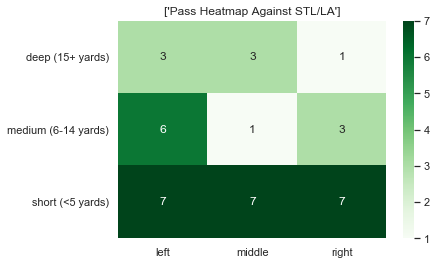

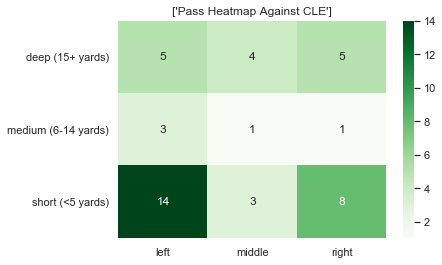

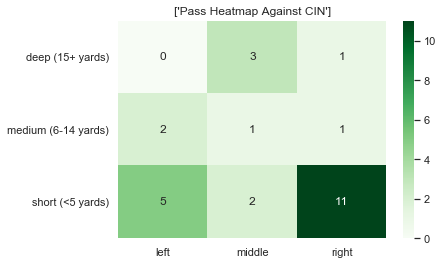

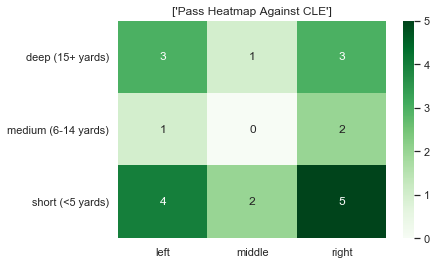

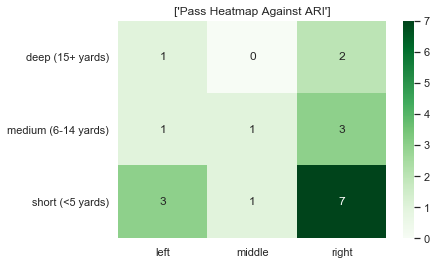

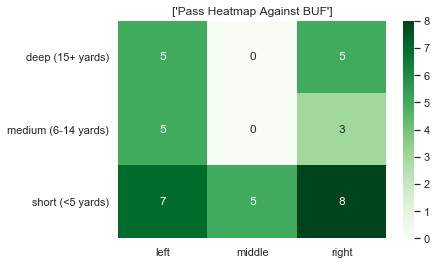

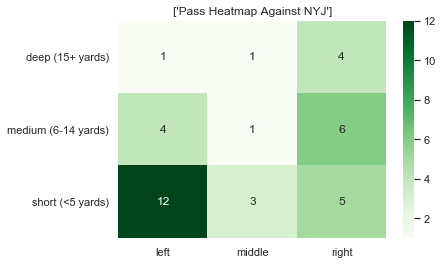

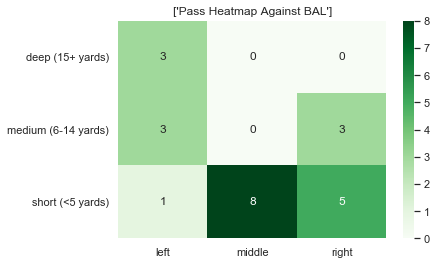

In [58]:
plot_pass_year('PIT', '2019')

In [59]:
def run_heatmap(location,gap,run_array):
    if location =='left':
        if gap == 'end':
            run_array[0] += 1
        if gap == 'tackle':
            run_array[1] += 1
        if gap == 'guard':
            run_array[2] += 1
            
    if location =='middle':
        run_array[3] += 1
            
    if location == 'right':
        if gap == 'end':
            run_array[6] += 1
        if gap == 'tackle':
            run_array[5] += 1
        if gap == 'guard':
            run_array[4] += 1

In [60]:
def plot_run_year(team,year):
    team_pass_plays = run_plays_only[run_plays_only.posteam == team]
    team_pass_plays_year = team_pass_plays[team_pass_plays.year == year]
    game_ids = list(team_pass_plays_year.game_id.unique())
    
    for game in game_ids:
        run_array = [0,0,0,0,0,0,0]
        game_of_week = team_pass_plays[team_pass_plays.game_id == game]
        opponent = game_of_week.defteam.unique()
        
        game_of_week.apply(lambda x: run_heatmap(x.run_location,x.run_gap,run_array), axis = 1)
       # Plot results
        sns.heatmap([run_array], xticklabels=['L End', 'L Tackle', 'L Guard', 'Middle', 'R Guard', 'R Tackle', 'R End'],
        cmap= 'Greens',yticklabels = [''])
        plt.title('Run Heatmap Against ' + opponent)
        plt.show()
        
        

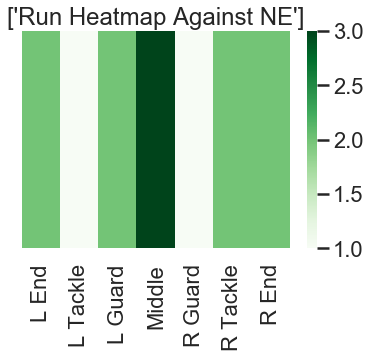

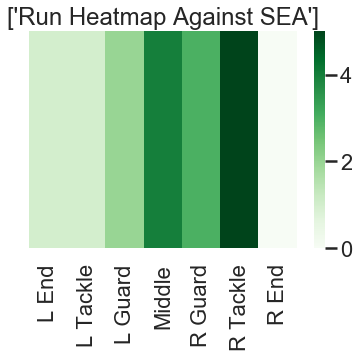

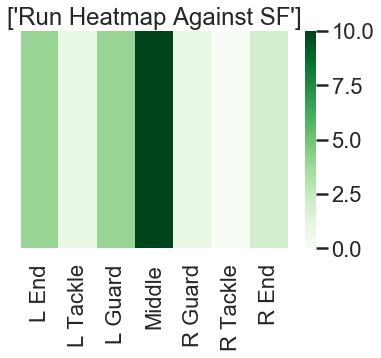

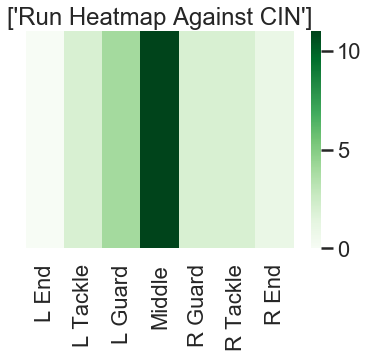

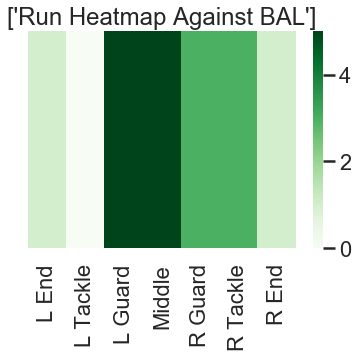

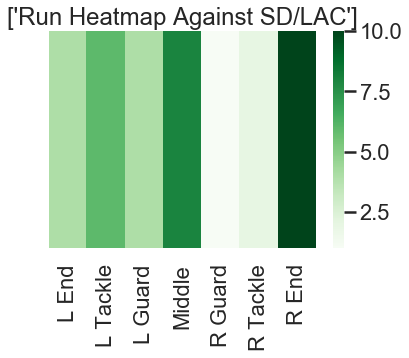

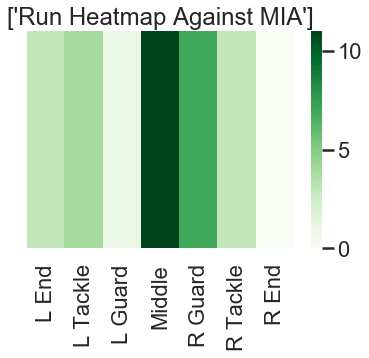

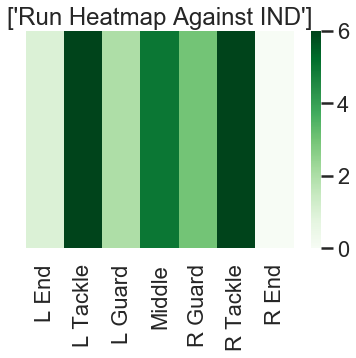

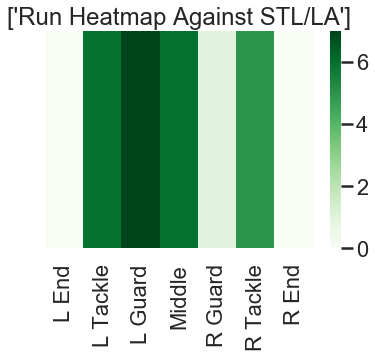

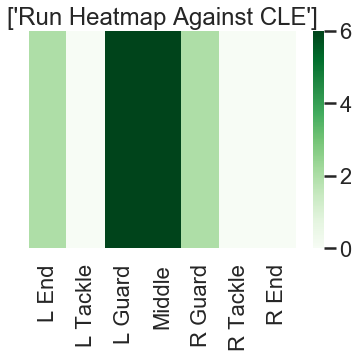

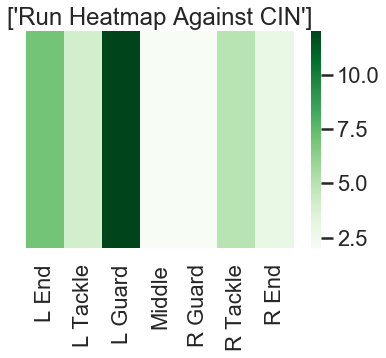

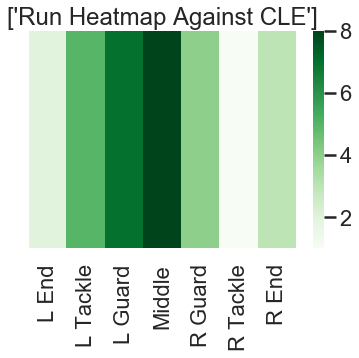

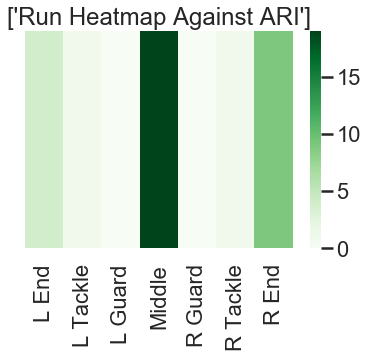

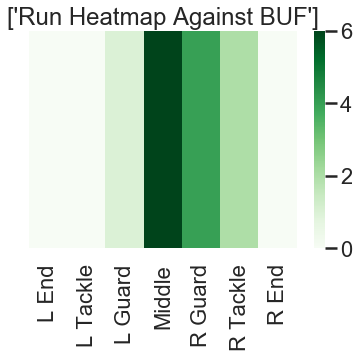

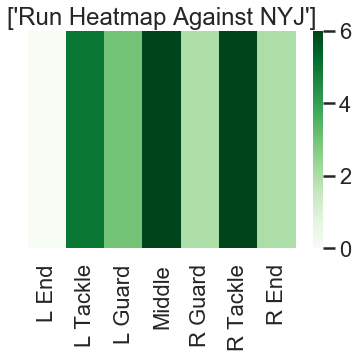

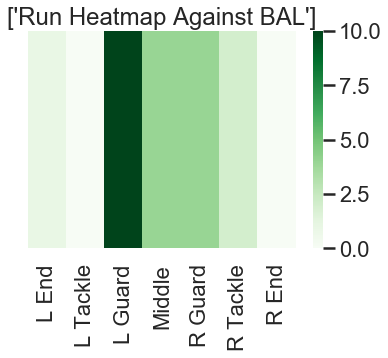

In [146]:
plot_run_year('PIT','2019')

# Helper Functions

In [129]:
def plot_pass_and_run(team, year):
    plot_pass_year(team,year)
    plot_run_year(team,year)

C:\Users\msf89\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


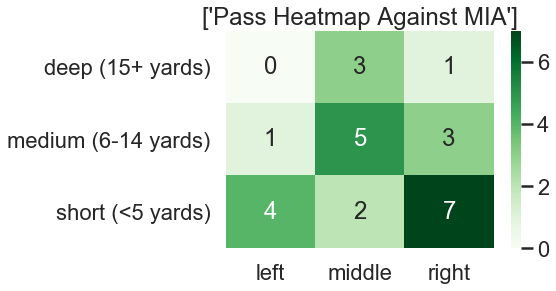

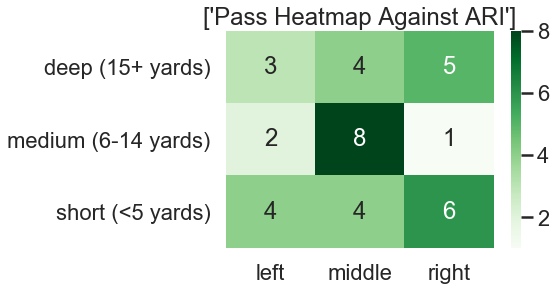

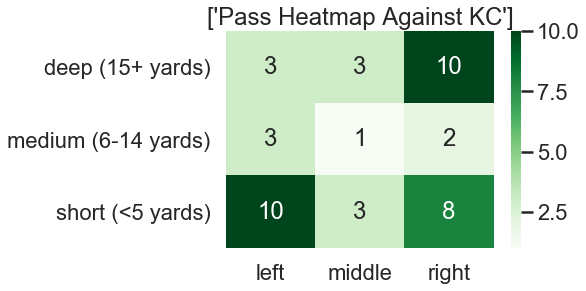

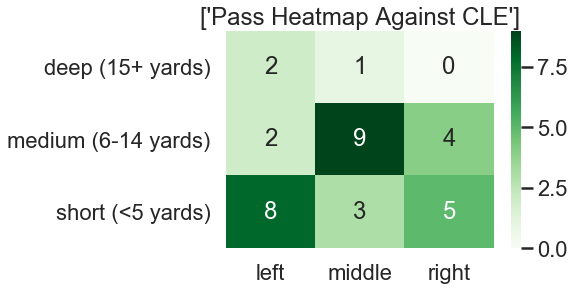

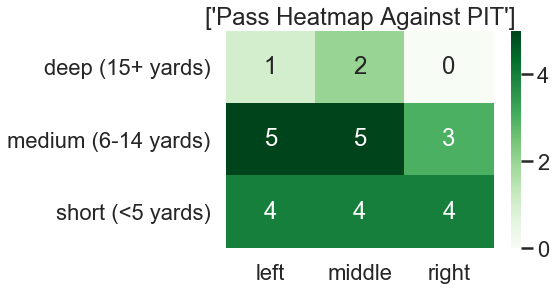

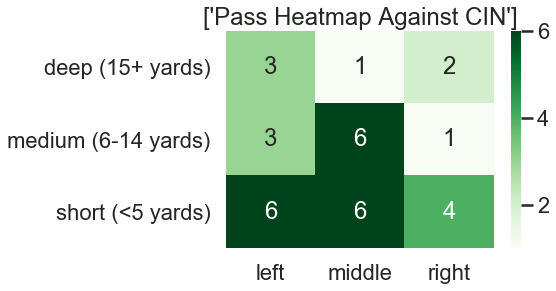

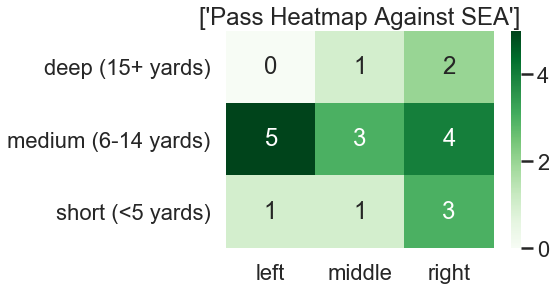

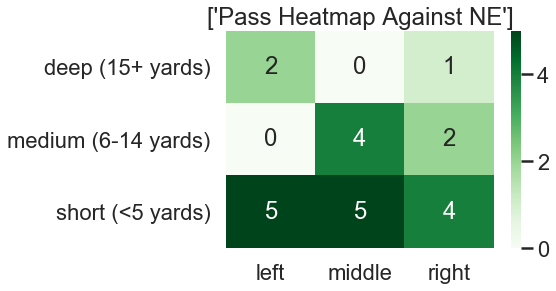

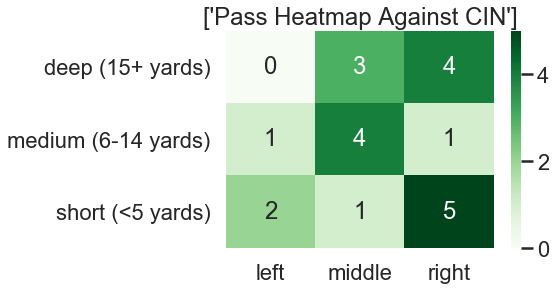

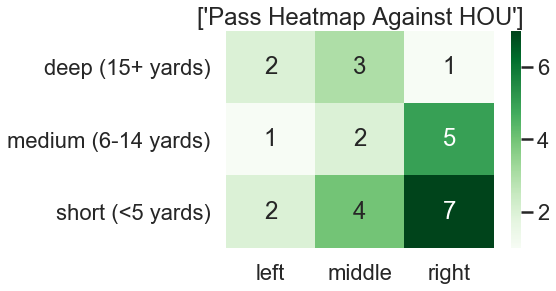

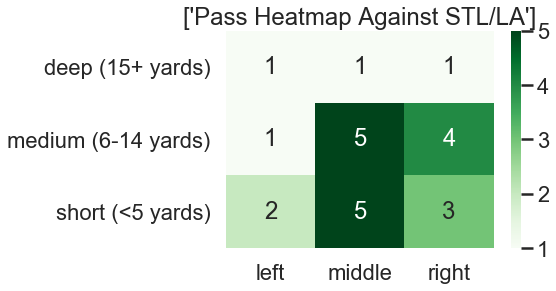

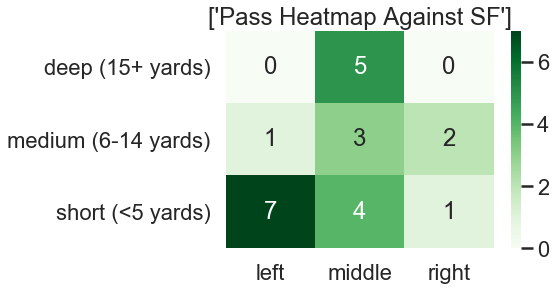

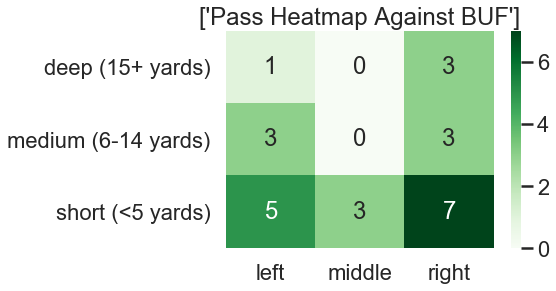

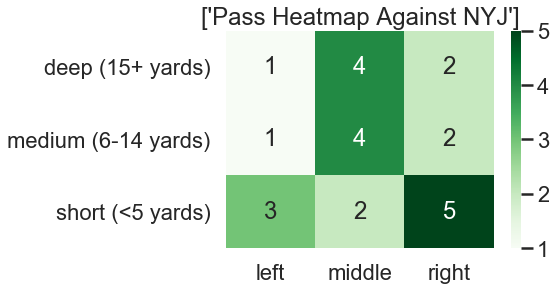

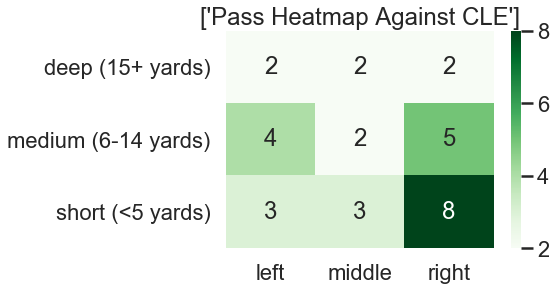

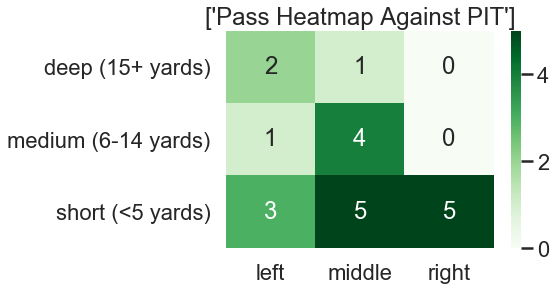

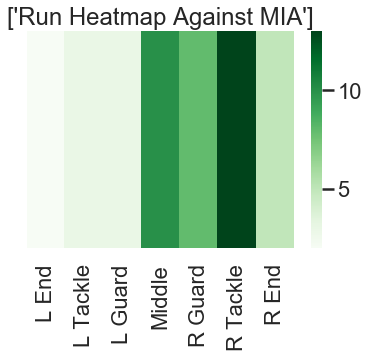

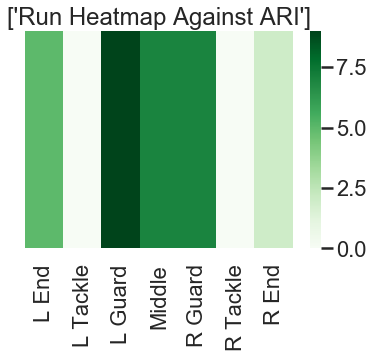

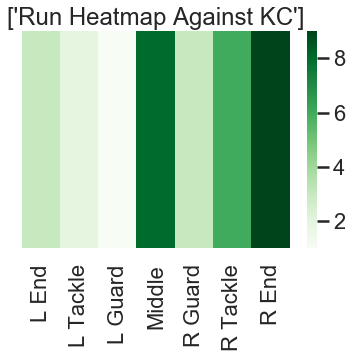

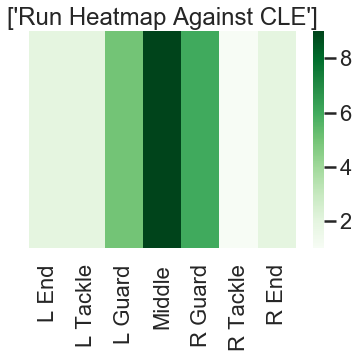

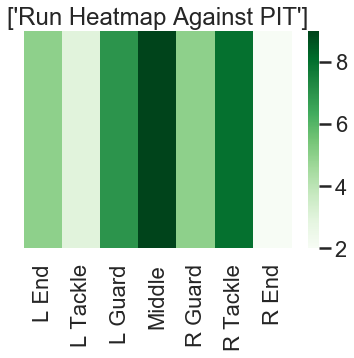

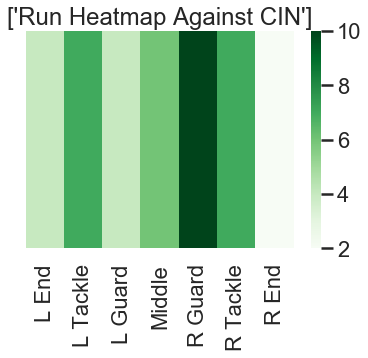

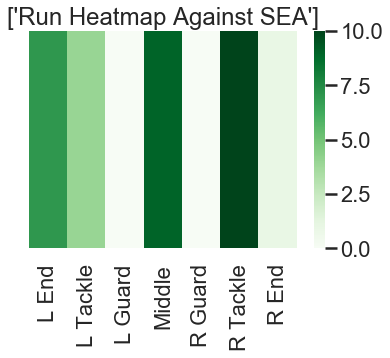

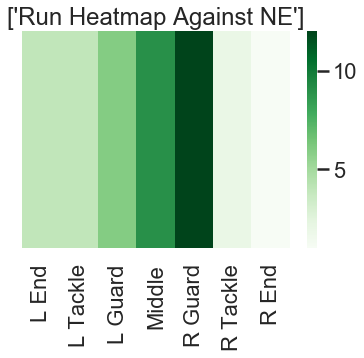

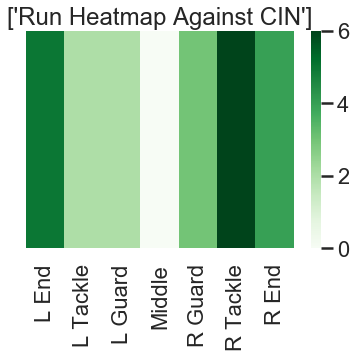

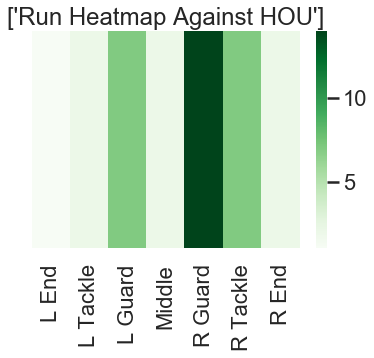

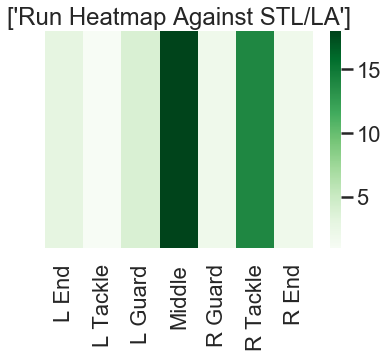

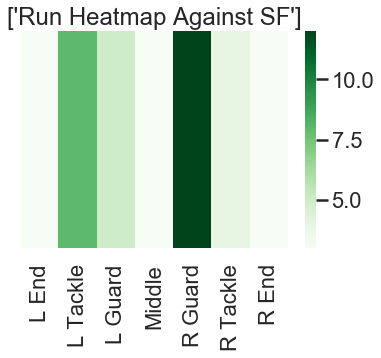

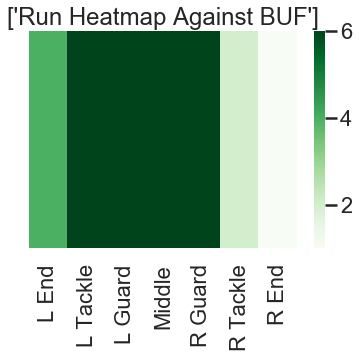

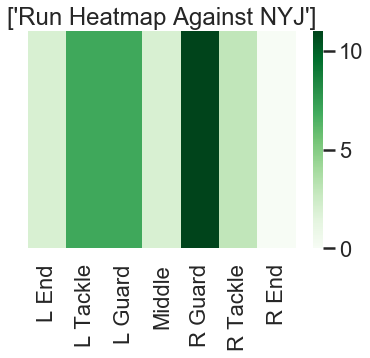

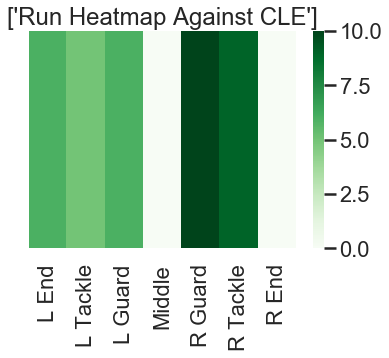

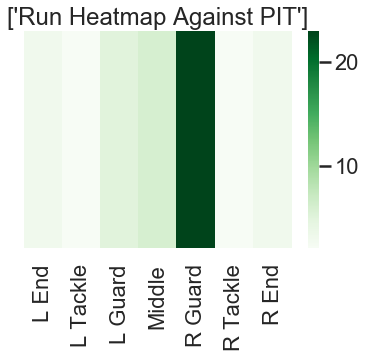

In [130]:
plot_pass_and_run('BAL', '2019')

# Final Visualizations

In [ ]:
pass_counts = (raw_data.groupby(['year'])['play_type']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
pass_counts

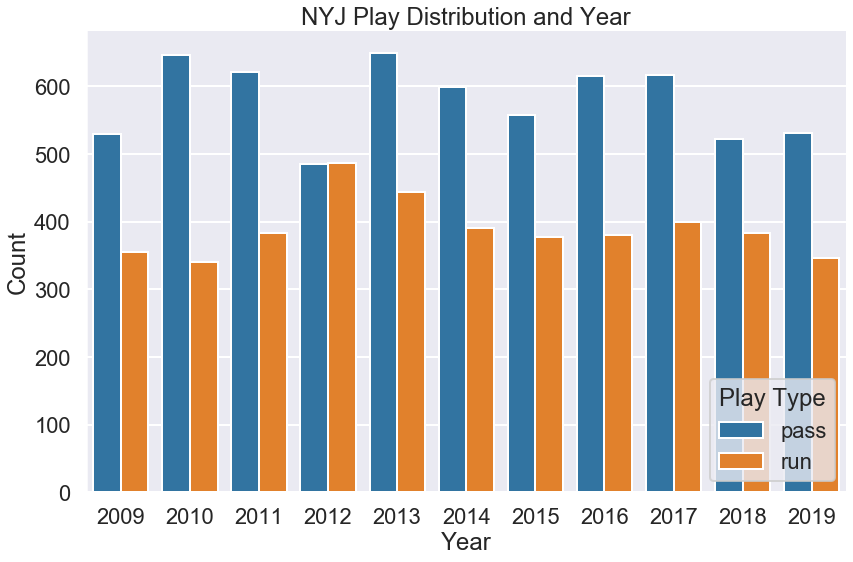

In [131]:
nyj_data = raw_data[raw_data.posteam == 'NYJ']
sns.catplot(x='year', hue = 'play_type',kind = 'count', hue_order = ['pass','run'], data = data, height = 8, aspect = 1.5, legend = False)
plt.title('NYJ Play Distribution and Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title = 'Play Type', fancybox = True, loc = 'lower right')
plt.show()

In [133]:
nyj_play_counts = (nyj_data.groupby(['year'])['play_type']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
nyj_play_counts

year play_type  percentage
0   2009       run   57.036247
1   2009      pass   42.963753
2   2010      pass   50.931099
3   2010       run   49.068901
4   2011      pass   55.522682
5   2011       run   44.477318
6   2012      pass   52.680222
7   2012       run   47.319778
8   2013      pass   52.095808
9   2013       run   47.904192
10  2014      pass   52.119461
11  2014       run   47.880539
12  2015      pass   58.624128
13  2015       run   41.375872
14  2016      pass   59.695431
15  2016       run   40.304569
16  2017      pass   57.212954
17  2017       run   42.787046
18  2018      pass   58.632287
19  2018       run   41.367713
20  2019      pass   61.217949
21  2019       run   38.782051

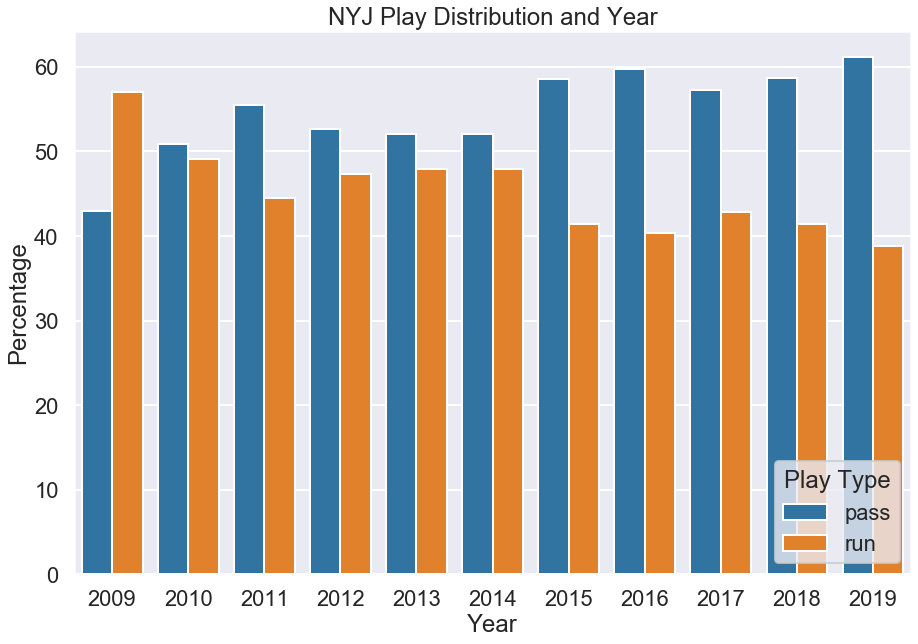

In [139]:
sns.set_context('poster')
plt.figure(figsize= (15,10))
sns.barplot(x="year", y=nyj_play_counts.percentage, hue="play_type", data=nyj_play_counts, 
            hue_order = ['pass','run'])
plt.title('NYJ Play Distribution and Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title = 'Play Type', fancybox = True, loc = 'lower right')
plt.show()

C:\Users\msf89\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


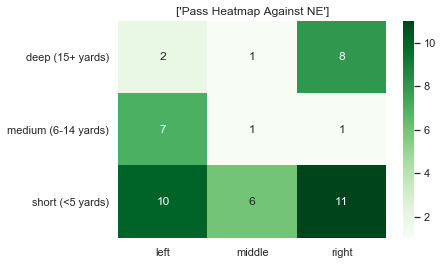

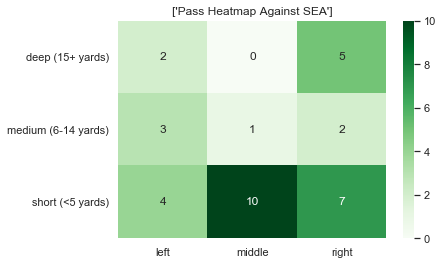

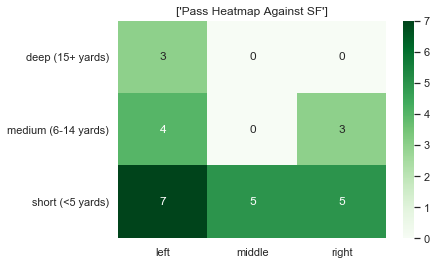

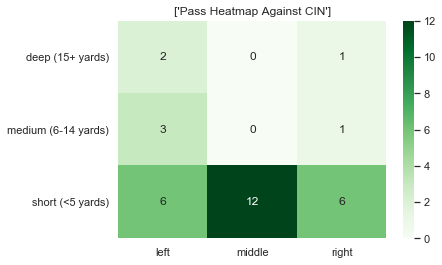

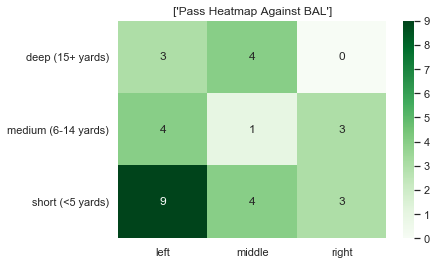

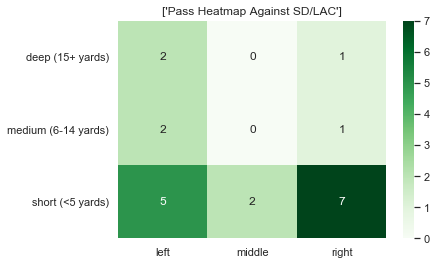

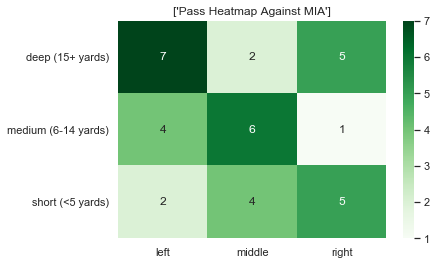

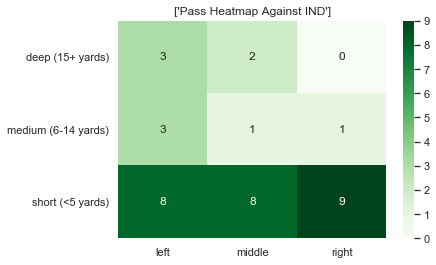

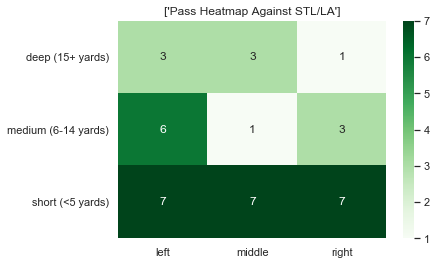

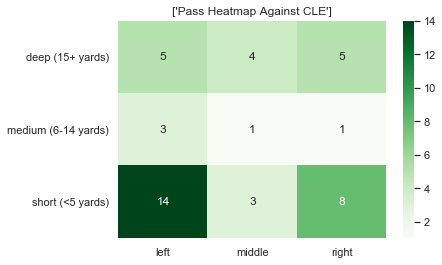

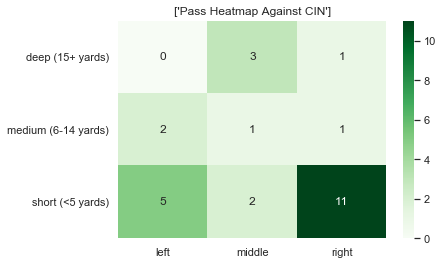

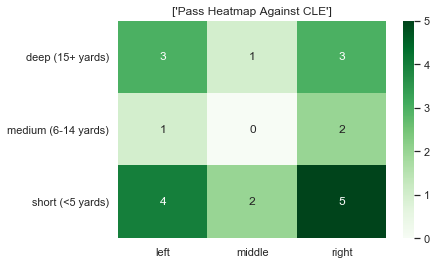

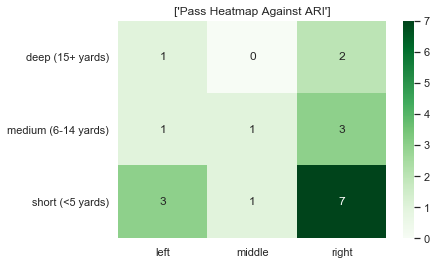

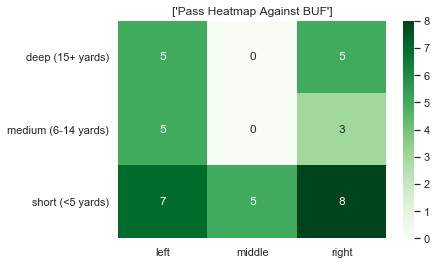

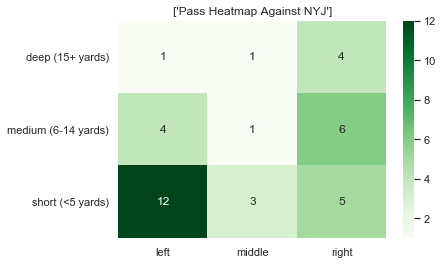

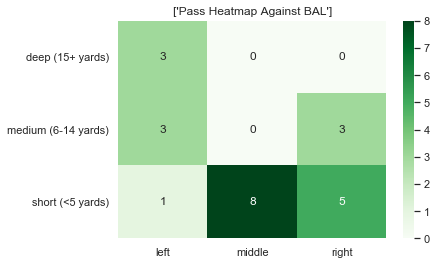

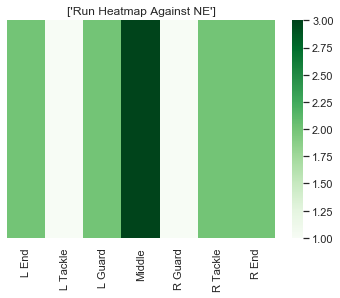

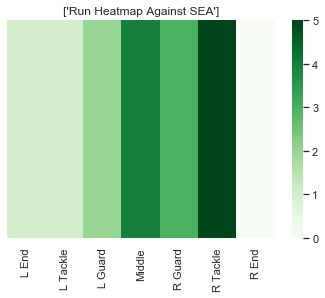

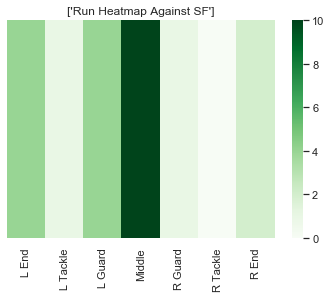

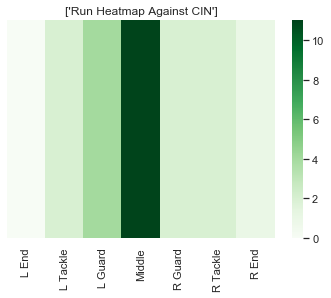

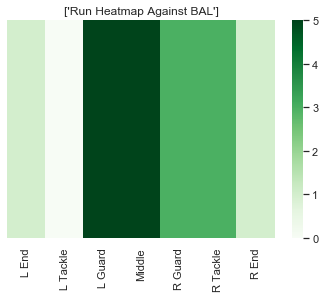

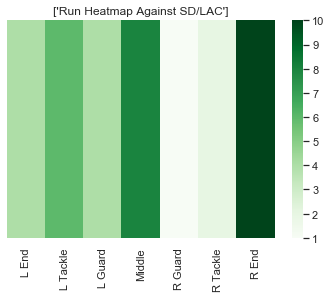

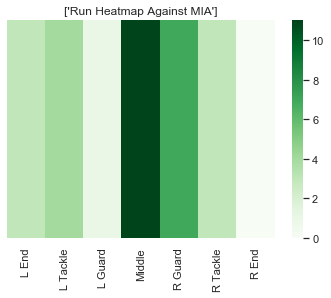

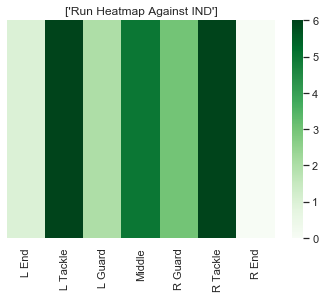

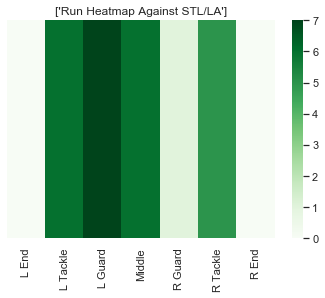

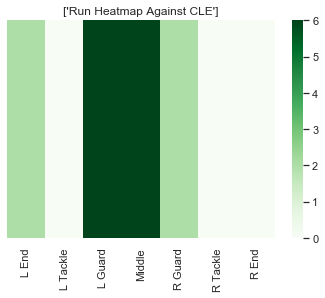

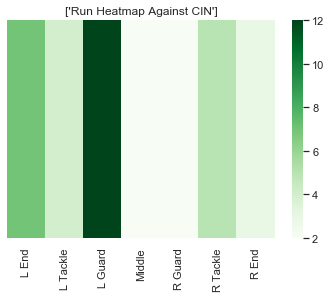

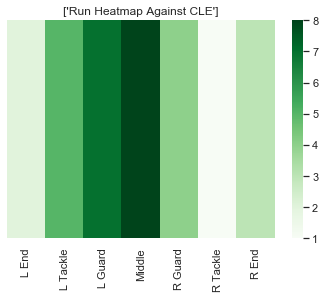

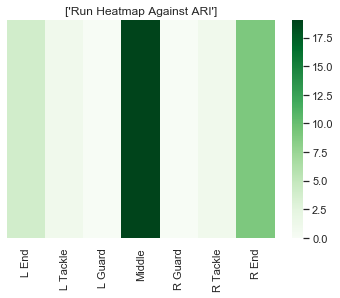

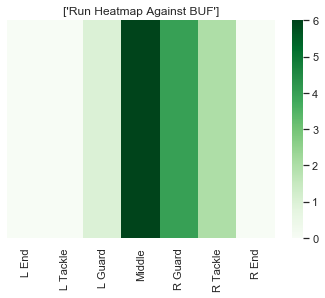

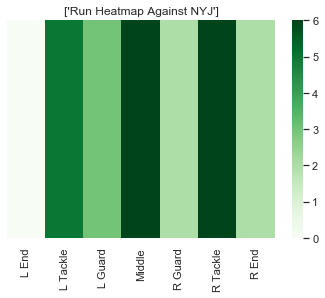

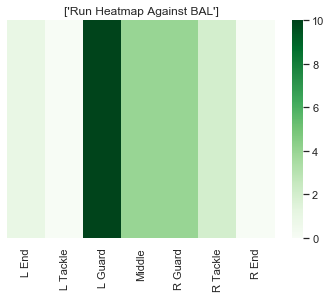

In [147]:
sns.set_context('notebook')
plot_pass_and_run('PIT', '2019')

In [140]:
nyj_data = raw_data[raw_data.posteam == 'NYJ']
nyj_data_2019 = nyj_data[nyj_data.year == '2019']
nyj_data_2019

play_id     game_id posteam defteam  yardline_100   game_date  quarter_seconds_remaining  half_seconds_remaining  game_seconds_remaining game_half  ...  defteam_timeouts_remaining  posteam_score defteam_score        wp    def_wp posteam_home side_of_field_own           scor_diff  yards_for_first_down  year
318368      259  2019090805     NYJ     BUF            62  2019-09-08                        724                    1624                  3424.0     Half1  ...                           3              0             0  0.546380  0.453620            1                 1                tied                    10  2019
318369      280  2019090805     NYJ     BUF            57  2019-09-08                        693                    1593                  3393.0     Half1  ...                           3              0             0  0.550053  0.449947            1                 1                tied                   4-6  2019
318370      302  2019090805     NYJ     BUF            57  2019-09-08                        689                    1589                  3389.0     Half1  ...                           3              0             0  0.523085  0.476915            1                 1                tied                   4-6  2019
318381      818  2019090805     NYJ     BUF            97  2019-09-08                        354                    1254                  3054.0     Half1  ...                           3              6             0  0.645553  0.354447            1                 1  ahead_by_one_score                 11-15  2019
318382      843  2019090805     NYJ     BUF            99  2019-09-08                        316                    1216                  3016.0     Half1  ...                           3              6             0  0.613392  0.386608            1                 1  ahead_by_one_score                 11-15  2019
...         ...         ...     ...     ...           ...         ...                        ...                     ...                     ...       ...  ...                         ...            ...           ...       ...       ...          ...               ...                 ...                   ...   ...
348523     3911  2019122901     NYJ     BUF            43  2019-12-29                        275                     275                   275.0     Half2  ...                           2             10             3  0.895469  0.104531            0                 0  ahead_by_one_score                 11-15  2019
348524     3932  2019122901     NYJ     BUF            43  2019-12-29                        232                     232                   232.0     Half2  ...                           2             10             3  0.892350  0.107650            0                 0  ahead_by_one_score                 11-15  2019
348525     3956  2019122901     NYJ     BUF            28  2019-12-29                        189                     189                   189.0     Half2  ...                           2             10             3  0.943562  0.056438            0                 0  ahead_by_one_score                    10  2019
348526     4009  2019122901     NYJ     BUF            26  2019-12-29                        183                     183                   183.0     Half2  ...                           1             10             3  0.941267  0.058733            0                 0  ahead_by_one_score                   7-9  2019
348527     4046  2019122901     NYJ     BUF            30  2019-12-29                        178                     178                   178.0     Half2  ...                           0             10             3  0.926292  0.073708            0                 0  ahead_by_one_score                 11-15  2019

[936 rows x 39 columns]

In [141]:
down_counts = (nyj_data_2019.groupby(['down'])['play_type']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
down_counts

down play_type  percentage
0  1.0      pass   51.908397
1  1.0       run   48.091603
2  2.0      pass   59.677419
3  2.0       run   40.322581
4  2PT      pass  100.000000
5  3.0      pass   80.094787
6  3.0       run   19.905213
7  4.0      pass   61.111111
8  4.0       run   38.888889

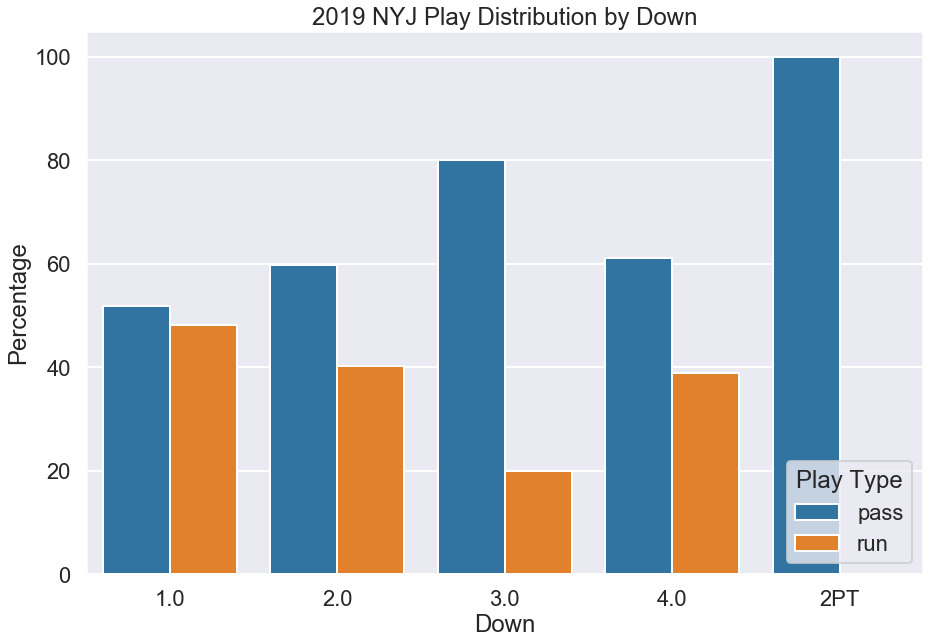

In [143]:
sns.set_context('poster')
plt.figure(figsize= (15,10))
sns.barplot(x="down", y=down_counts.percentage, hue="play_type", data=down_counts,
           order = ['1.0','2.0', '3.0', '4.0', '2PT'])
plt.title('2019 NYJ Play Distribution by Down')
plt.xlabel('Down')
plt.ylabel('Percentage')
plt.legend(title = 'Play Type', fancybox = True, loc = 'lower right')
plt.show()

In [144]:
qtr_counts = (nyj_data_2019.groupby(['qtr'])['play_type']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
qtr_counts

qtr play_type  percentage
0    1      pass   56.066946
1    1       run   43.933054
2    2      pass   62.601626
3    2       run   37.398374
4    3      pass   59.313725
5    3       run   40.686275
6    4      pass   66.396761
7    4       run   33.603239

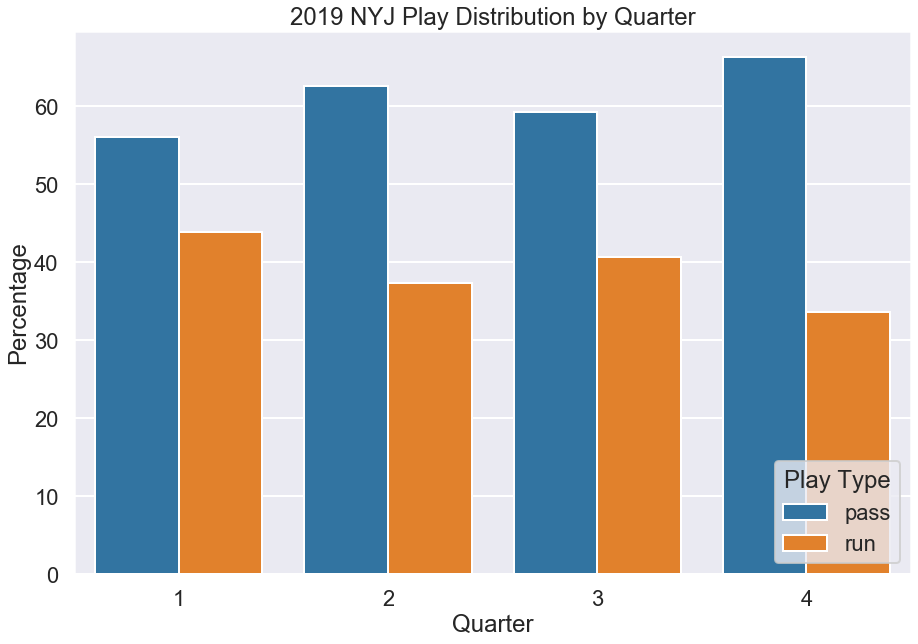

In [145]:
sns.set_context('poster')
plt.figure(figsize= (15,10))
sns.barplot(x="qtr", y=qtr_counts.percentage, hue="play_type", data=qtr_counts)
plt.title('2019 NYJ Play Distribution by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Percentage')
plt.legend(title = 'Play Type', fancybox = True, loc = 'lower right')
plt.show()